# Scikit-Learn Jupyter Notebook

[Offical Documentation](https://scikit-learn.org/stable/)

***

## Python libaries

In [1]:
# standard libaries

#for plotting
import matplotlib.pyplot as plt
# matplotlib colors
import matplotlib.colors as colors

#visualisation
import seaborn as sns

#dataframes
import pandas as pd

#numerical arrays
import numpy as np

#scit-learn functions

#KNN neighbors clssifer
from sklearn.neighbors import KNeighborsClassifier

# train test data split
from sklearn.model_selection import train_test_split

# data preprocessing scaling function
from sklearn.preprocessing import scale

#support vector machine 
from sklearn.svm import SVC

#Grid search for hypertuning
from sklearn.model_selection import GridSearchCV

#for confusion matrix
from sklearn.metrics import confusion_matrix

#confusion matrix plot
from sklearn.metrics import plot_confusion_matrix

#model accuaracy score
from sklearn.metrics import accuracy_score

#cross validation of model scores
from sklearn.model_selection import cross_val_score

#regression
import sklearn.linear_model as lm

#for results and result metrics
from sklearn import metrics

#sklearn built in datasets
from sklearn import svm, datasets

#data preprocessing scaling
from sklearn.preprocessing import StandardScaler

# kfold cross validation
from sklearn.model_selection import KFold

## Plot styles 

In [2]:
#plot styles
plt.style.use('seaborn')


#default plot size
plt.rcParams['figure.figsize'] = [14, 12]

***


### SK Learn Overview

# overview goes here

***

## Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning).





### Reading in dataset

* Import dataset from Seaborn
* Dataset part of seaborn built-in datasets

In [3]:
#dataframe
df = sns.load_dataset("penguins")

* View first 10 rows of the dataset

In [4]:
#first 10 rows
df.head(10)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       3625.0  Female  
7       4675.0    Male  
8       3475.0     NaN  
9       4250.0     NaN

##### Datatypes

In [5]:
#datatypes
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

* *species*, *island* and *sex* data type is an object and the rest at floating point numbers

##### Summary Statistics

In [6]:
#view summary stats
df.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

In [7]:
#summary stats for all variables
df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      342.000000     342.000000         342.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       152     168             NaN            NaN                NaN   
mean       NaN     NaN       43.921930      17.151170         200.915205   
std        NaN     NaN        5.459584       1.974793          14.061714   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.225000      15.600000         190.000000   
50%        NaN     NaN       44.450000      17.300000         197.000000   
75%        NaN     NaN       48.500000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex  
count    342.000000   333  
unique          NaN     2  
top             NaN  Male  
freq            NaN   168  
mean    4201.754386   NaN  
std      801.954536   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4750.000000   NaN  
max     6300.000000   NaN

##### 3. Null Value check

In [8]:
#check for nulls
display(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

* *Species* and *island* columns contain no **NULL** values
* *Sex* contains 11 **NULL* values

We can print off the object (categorical) data types to see the unique values.

In [9]:
#print unique values of categorical data
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())

#% summary of missing values
print("")
print("% Missing sex data")
print(df['sex'].isnull().sum()/len(df))
print("")
print("% Missing bill_length_mm/bill_dept_mm/flipper_length/body_mass_g")
print(df['bill_length_mm'].isnull().sum()/len(df))


['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]

% Missing sex data
0.03197674418604651

% Missing bill_length_mm/bill_dept_mm/flipper_length/body_mass_g
0.005813953488372093


##### Handling missing values
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

* Approx 3% of the data in the sex column is missing. This is a bit high to completley remove especially in a small dataset
* The null values in the *sex* column will be replaced by the value that appears most frequently i.e. *mode*
* The null values in the numerical columns will be replaced by the the mean of them columns.
* Just over 0.5% of the data in these columns are missing so the mean is a sensible option

In [10]:
#calculating mode for sex column
mode_sex = df['sex'].mode()[0]  
df['sex'].fillna(mode_sex,inplace=True)

#replacing column with mode filled in
df['sex'] = df['sex'].str.replace(".",mode_sex)

#check sex for nulls
print(df['sex'].unique())
print('Now only two unique values for sex')

['Male' 'Female']
Now only two unique values for sex


In [11]:
#apply mean value for other columns with null values
df['bill_length_mm'].fillna(df.groupby('species')['bill_length_mm'].transform('mean'),inplace=True)
df['bill_depth_mm'].fillna(df.groupby('species')['bill_depth_mm'].transform('mean'),inplace=True)
df['flipper_length_mm'].fillna(df.groupby('species')['flipper_length_mm'].transform('mean'),inplace=True)
df['body_mass_g'].fillna(df.groupby('species')['body_mass_g'].transform('mean'),inplace=True)

display(df.isnull().sum())
print("")
print('No null values reamain')

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


No null values reamain


##### Re run of Summary Statistics

In [12]:
#summary stats
df.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      344.000000     344.000000         344.000000   344.000000
mean        43.917431      17.148339         200.930641  4202.839182
std          5.454118       1.973561          14.060613   801.461347
min         32.100000      13.100000         172.000000  2700.000000
25%         39.200000      15.575000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.250000  4756.250000
max         59.600000      21.500000         231.000000  6300.000000

In [13]:
#summary stats all variables
df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      344.000000     344.000000         344.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       152     168             NaN            NaN                NaN   
mean       NaN     NaN       43.917431      17.148339         200.930641   
std        NaN     NaN        5.454118       1.973561          14.060613   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.200000      15.575000         190.000000   
50%        NaN     NaN       44.450000      17.300000         197.000000   
75%        NaN     NaN       48.500000      18.700000         213.250000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex  
count    344.000000   344  
unique          NaN     2  
top             NaN  Male  
freq            NaN   179  
mean    4202.839182   NaN  
std      801.461347   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4756.250000   NaN  
max     6300.000000   NaN

We can observe from re running the summary statistics that using the mean for the floating point data to replace null values has had very little effect.

Now we have a complete dataset to work with.

<br>

***

### Data Visualisation

* Perform and Exporatory Data Analysis on the Dataset

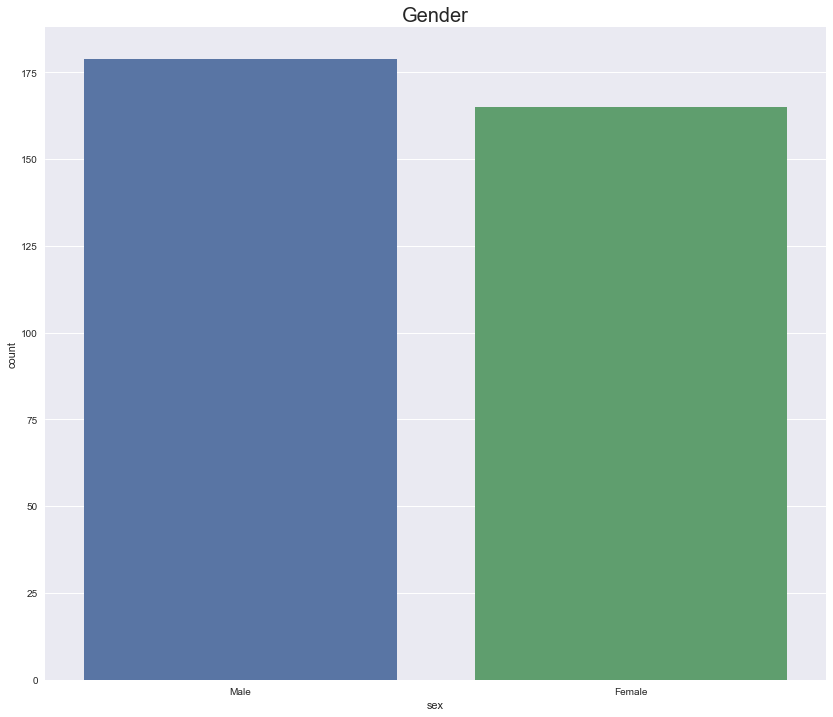

In [14]:
#seaborn countplot
# x for the category count
# data for the datasource of catrgory
# .set_title for plot name and fontsize etc.
sns.countplot(x='sex',data=df).set_title('Gender',fontsize=20);

* Gender breakdown in the datset seem almost equal between male and female 

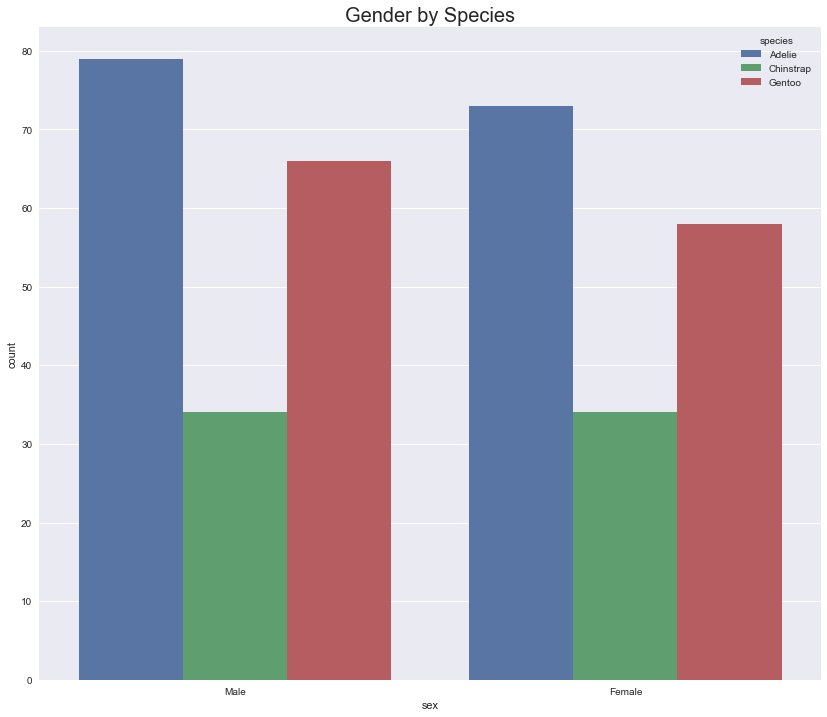

In [15]:
#seaborn countplot
sns.countplot(x='sex',data=df,hue='species').set_title('Gender by Species',fontsize=20);

* We can observe an equal gender breakdown per species

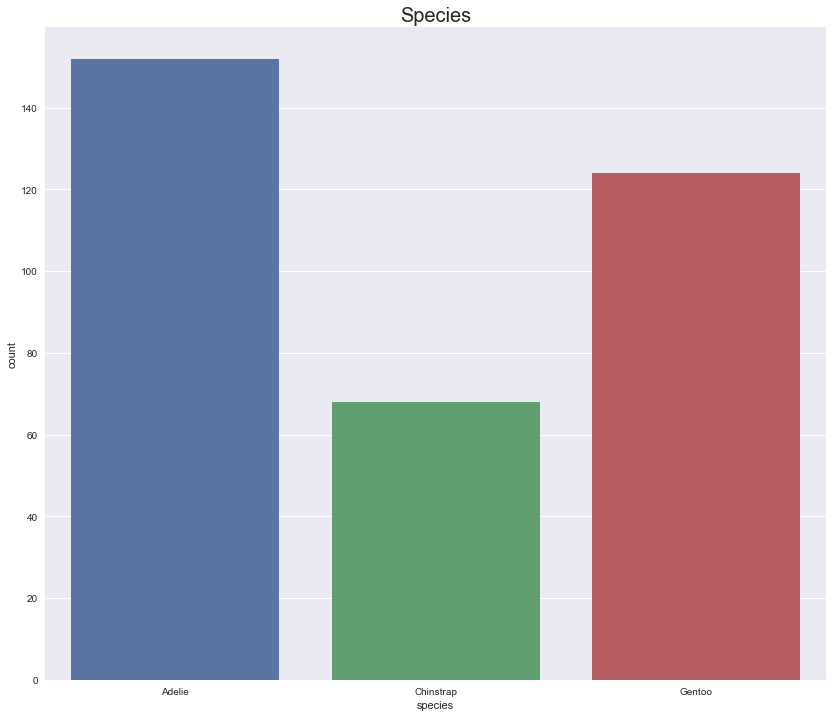

In [16]:
#seabborn countplot
sns.countplot(x='species',data=df).set_title('Species',fontsize=20);

* Adelie is the most common species in the datset followed by Gentoo and then Chinstrap

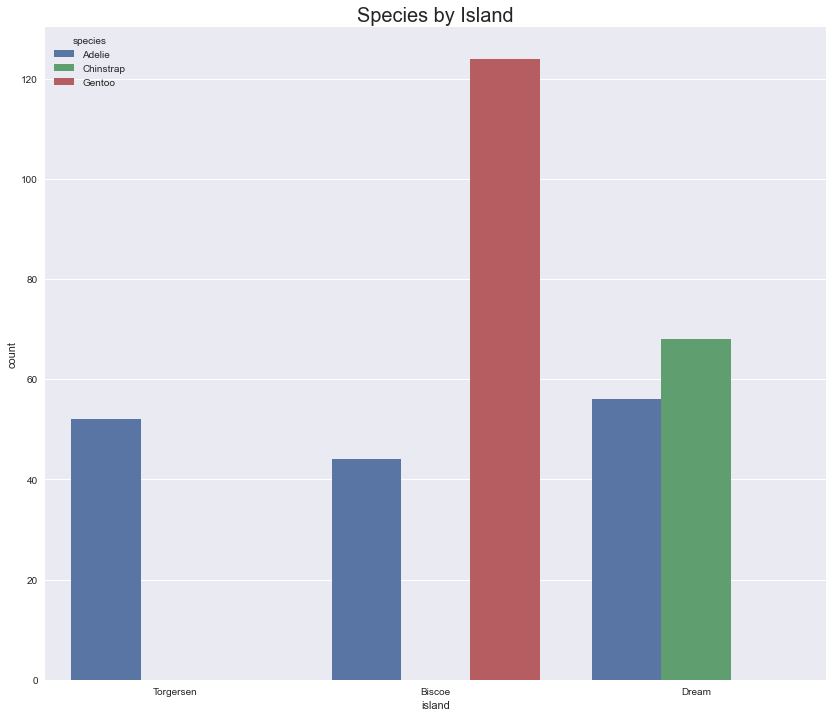

In [17]:
#seaborn countplot
sns.countplot(x='island',data=df,hue='species').set_title('Species by Island',fontsize=20);

* Adelie is the only species found in the three different islands in the dataset. The other two species are only found on one island.

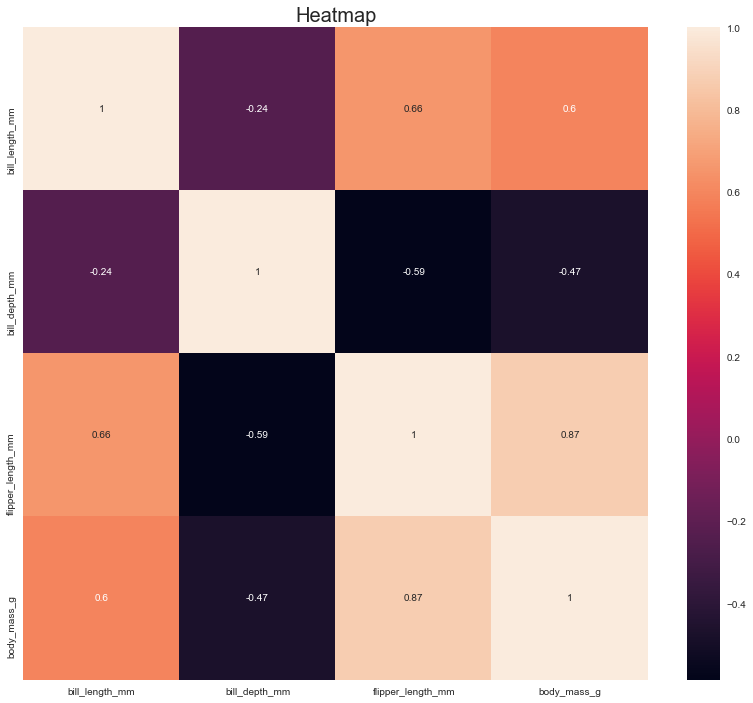

In [18]:
#heatmap of variables
# for correlation value between variables
# closer to 1 strong positive
# closer to -1 strong negative
#closer to 0 weak correalation
sns.heatmap(df.corr(),annot=True).set_title('Heatmap',fontsize=20);

* Correlation
 * The closer you get to 1 indicates a stroong postive correlation
 * The closer you get to -1 indicates a strong negative correlation
 * The closer you get to 0 indicates very little correlation


* There is a strong postitive correlation between flipper length and body mass (0.87)
* There is a postive correlation between flipper length and bill length (0.66)
* There is a postive correlation between body_mass and bill length (0.66)

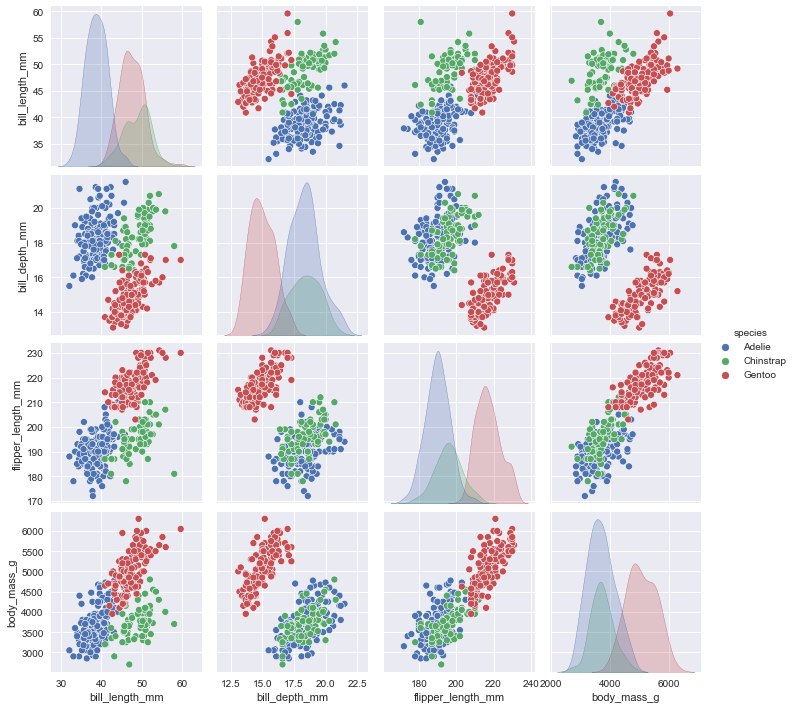

In [19]:
#seaborn pairplot
sns.pairplot(df,hue='species');

* Observing the pairplot, there appears to be somewhat of a seperation of species with:
    * bill_length:body_mass
    * bill length: flipper_length
    * bill_length: bill_depth
    
* we can plot these individually

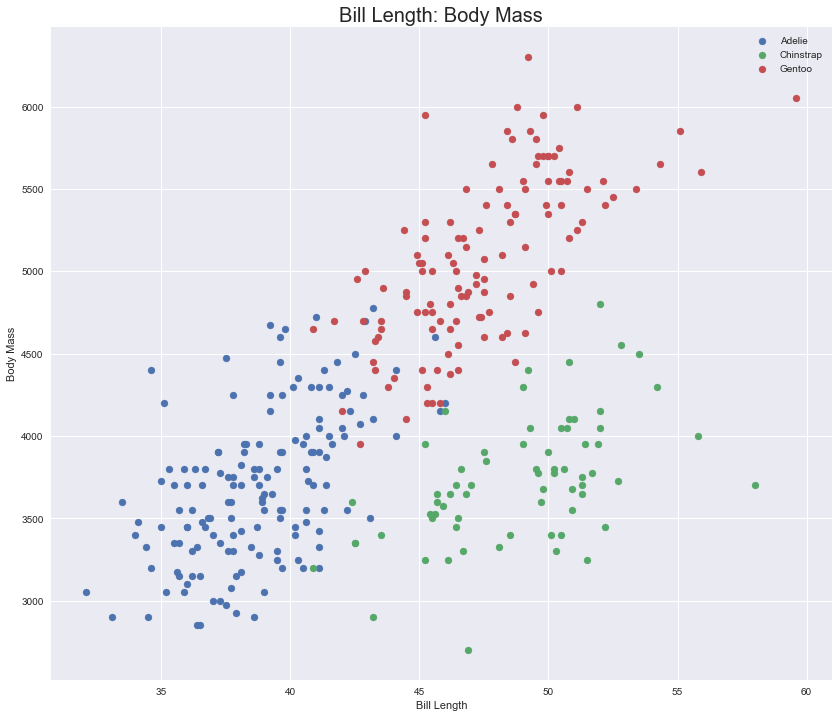

In [20]:
# Segregate the data.
#'Adelie' 'Chinstrap' 'Gentoo'
adelie = df[df['species'] == 'Adelie']
chinstrap = df[df['species'] == 'Chinstrap']
gentoo = df[df['species'] == 'Gentoo']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(adelie['bill_length_mm'], adelie['body_mass_g'], label='Adelie')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['body_mass_g'], label='Chinstrap')
ax.scatter(gentoo['bill_length_mm'], gentoo['body_mass_g'], label='Gentoo')

# Show the legend.
ax.set_xlabel('Bill Length')
ax.set_ylabel('Body Mass')
ax.legend()
ax.set_title('Bill Length: Body Mass',fontsize=20);

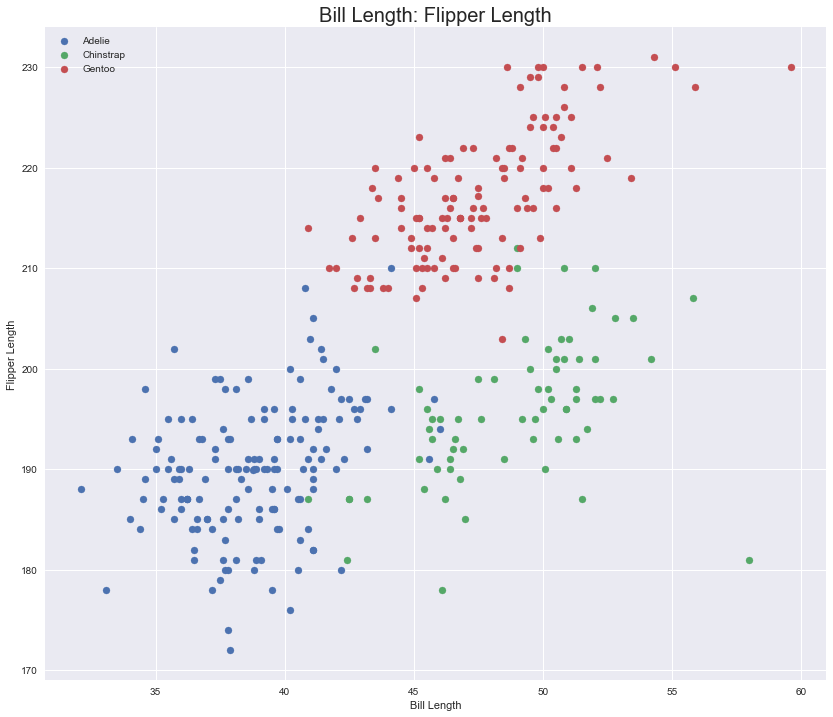

In [21]:
# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(adelie['bill_length_mm'], adelie['flipper_length_mm'], label='Adelie')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['flipper_length_mm'], label='Chinstrap')
ax.scatter(gentoo['bill_length_mm'], gentoo['flipper_length_mm'], label='Gentoo')

# Show the legend.
ax.set_xlabel('Bill Length')
ax.set_ylabel('Flipper Length')
ax.legend()
ax.set_title('Bill Length: Flipper Length',fontsize=20);

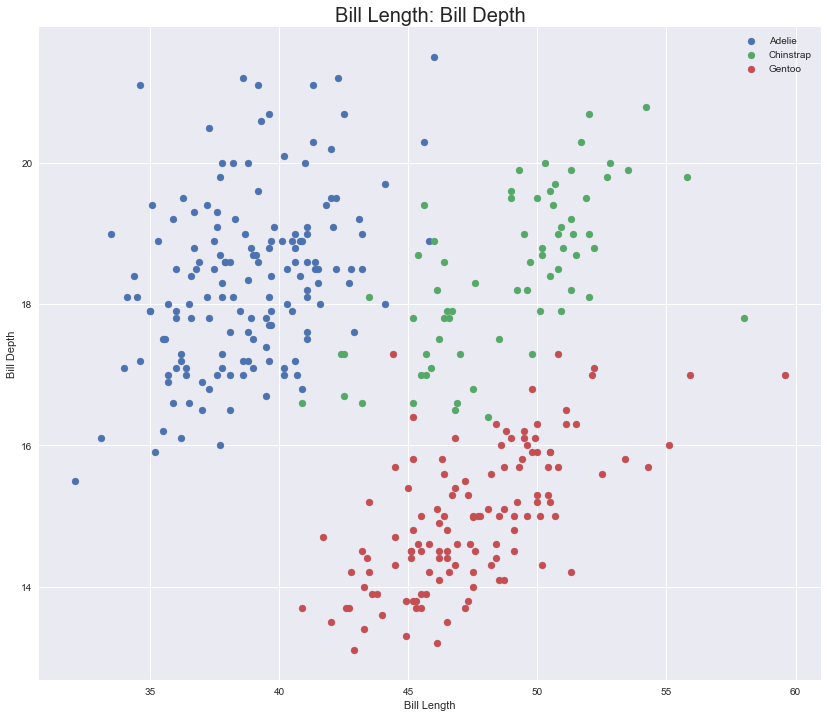

In [22]:
# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(adelie['bill_length_mm'], adelie['bill_depth_mm'], label='Adelie')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['bill_depth_mm'], label='Chinstrap')
ax.scatter(gentoo['bill_length_mm'], gentoo['bill_depth_mm'], label='Gentoo')

# Show the legend.
ax.set_xlabel('Bill Length')
ax.set_ylabel('Bill Depth')
ax.legend()
ax.set_title('Bill Length: Bill Depth',fontsize=20);

* The above plots are the best examples of how the species can be seperated depending on the relative variables.
* We can perform a two dimensional KNN classification on any of these as an example. 
* For this example I am going to use Flipper Length and Bill Length
* After this we can perform the a KNN classification on all the data.

***

    
### KNeighborsClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### Split the dataset into train and test data
Now we will split the dataset into into training data and testing data. The training data is the data that the model will learn from. The testing data is the data we will use to see how well the model performs on unseen data.

##### train_test_split function explanation

ref: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

* takes in 5 parameters. 

* The first two parameters are the input and target data we split up earlier. 

* ‘test_size’ to 0.2. This means that 20% of all the data will be used for testing, which leaves 80% of the data as training data for the model to learn from. 

* Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.

* Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. For example, in our dataset, if 25% of patients have diabetes and 75% don’t have diabetes, setting ‘stratify’ to y will ensure that the random split has 25% of patients with diabetes and 75% of patients without diabetes.

Categorical Data apart from Species are to be dropped from the dataset

In [23]:
#dropping column(s) from dataset
df = df.drop(['island','sex'],axis=1)

#first 5 rows
df.head()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0  Adelie       39.100000      18.700000         181.000000  3750.000000
1  Adelie       39.500000      17.400000         186.000000  3800.000000
2  Adelie       40.300000      18.000000         195.000000  3250.000000
3  Adelie       38.791391      18.346358         189.953642  3700.662252
4  Adelie       36.700000      19.300000         193.000000  3450.000000

In [24]:
#from sklearn.model_selection import train_test_split
#split dataset into train and test data
train, test = train_test_split(df, test_size=0.2, random_state=42)#1,stratify=df['species'])

In [25]:
#category value counts
test['species'].value_counts()

Adelie       32
Gentoo       21
Chinstrap    16
Name: species, dtype: int64

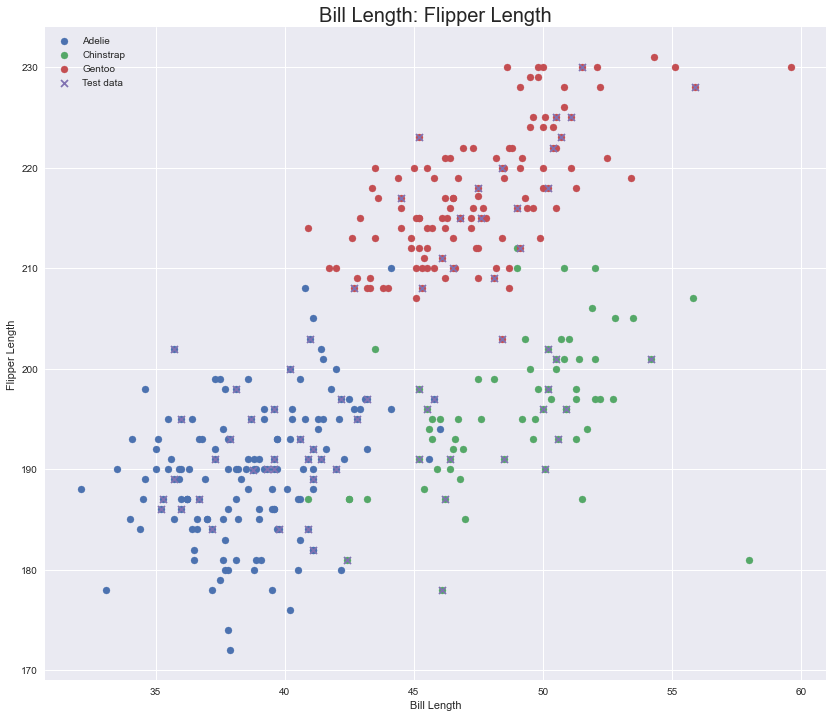

In [26]:
# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(adelie['bill_length_mm'], adelie['flipper_length_mm'], label='Adelie')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['flipper_length_mm'], label='Chinstrap')
ax.scatter(gentoo['bill_length_mm'], gentoo['flipper_length_mm'], label='Gentoo')

ax.scatter(test['bill_length_mm'], test['flipper_length_mm'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Bill Length')
ax.set_ylabel('Flipper Length')
ax.legend()
ax.set_title('Bill Length: Flipper Length',fontsize=20);

#### Two Dimensions Inputs and Outputs

In [27]:
#creating inputs and outputs for the model
inputs, outputs = train[['bill_length_mm','flipper_length_mm']], train['species']

#### Building and training the model

In [28]:
# Create KNN classifier
knn = KNeighborsClassifier()
# Fit the classifier to the data
knn.fit(inputs,outputs)

KNeighborsClassifier()

* First, we will create a new k-NN classifier to the default value of n_neighbors (5). To recap, this means that if at least 4 out of the 5 nearest points to an new data point are patients without diabetes, then the new data point will be labeled as ‘no diabetes’, and vice versa. In other words, a new data point is labeled with by majority from the 5 nearest points.

* We have set ‘n_neighbors’ to the default (5) as a starting point. We will go into more detail below on how to better select a value for ‘n_neighbors’ so that the model can improve its performance.

* Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as parameters to fit our model to the training data.

#### Testing the model

* Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data.

In [29]:
#show first 5 model predictions on the test data
knn.predict(test[['bill_length_mm','flipper_length_mm']])[0:5]

array(['Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap'],
      dtype=object)


* let’s see how our accurate our model is on the full test set. 

* use the ‘score’ function and pass in our test input and target data to see how well our model predictions match up to the actual results.

In [30]:
#check accuracy of our model on the test data
knn.score(test[['bill_length_mm','flipper_length_mm']],test['species'])

0.927536231884058

In [31]:
#predictions variable
predictions = knn.predict(test[['bill_length_mm','flipper_length_mm']])

##### Two Dimensions Misclassified


In [32]:
#add predictions to test dataframe
test['predictions'] = predictions

#missclass variable for cats classified incorrectly
# comparison of values between columns in pandas
misclass = test[test['predictions'] != test['species']]

#print number misclassed
print("-----------------------------------------")
print("The number of species misclassed is: ",len(misclass))
print("-----------------------------------------")

-----------------------------------------
The number of species misclassed is:  5
-----------------------------------------


<ipython-input-32-4a4007fac6a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


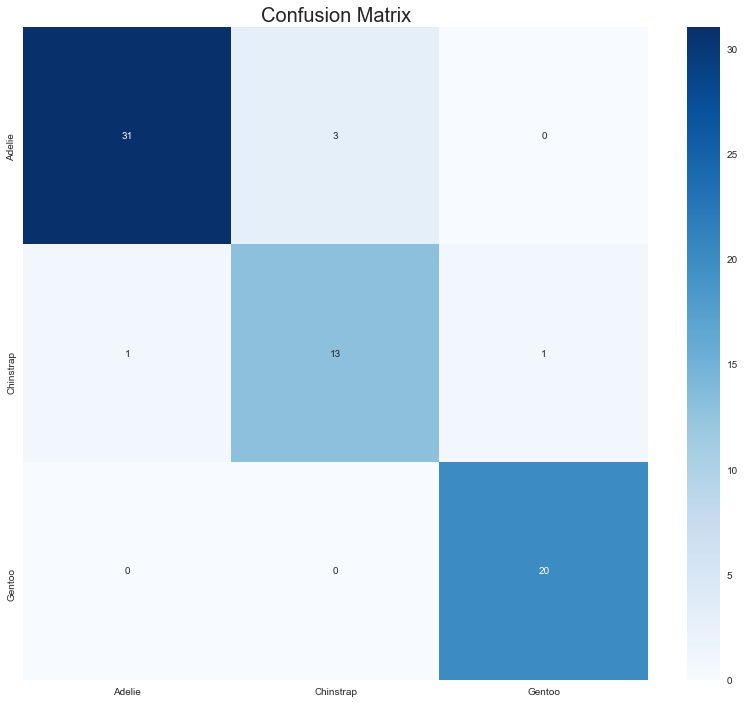

In [33]:
# ref https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# ref https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


#Generate the confusion matrix
cf_matrix = confusion_matrix(test['predictions'], test['species'])



# heatmap to display confusion matrix
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix',fontsize=20);


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
ax.yaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo']);

* Observing the above matrix, one *Adelie* was miscalssified as *Chinstrap*
* Three *Chinstrap* misclassified as *Adelie*

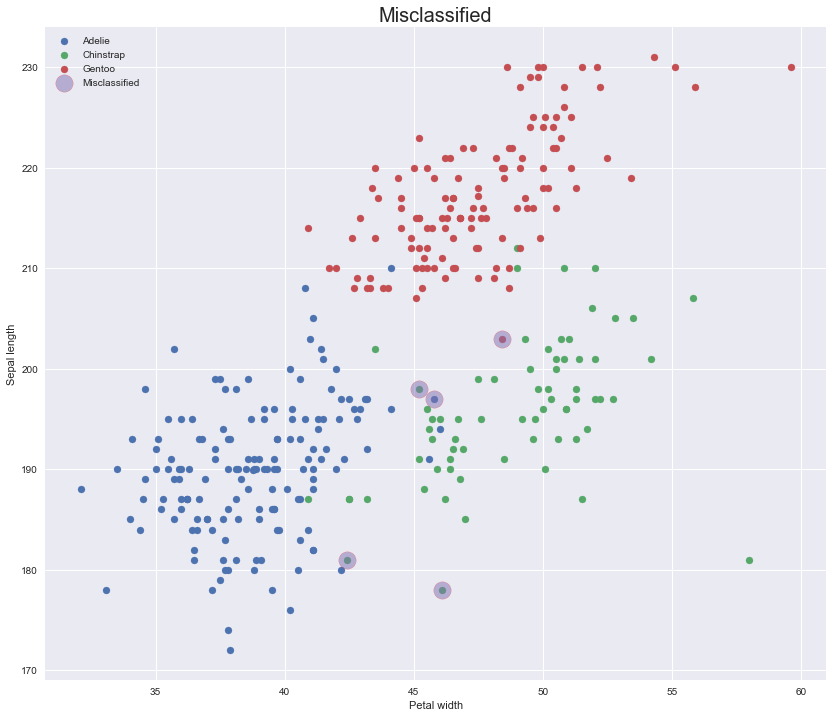

In [34]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
ax.scatter(adelie['bill_length_mm'], adelie['flipper_length_mm'], label='Adelie')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['flipper_length_mm'], label='Chinstrap')
ax.scatter(gentoo['bill_length_mm'], gentoo['flipper_length_mm'], label='Gentoo')

    
# Plot misclassified.
ax.scatter(misclass['bill_length_mm'], misclass['flipper_length_mm'], s=300,  alpha=0.5,edgecolor='red', label='Misclassified')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_title('Misclassified',fontsize=20)
ax.legend();

* In the above plot the missclassfied data are circled

### Using all inputs

In [35]:
#split dataset into train and test data
train, test = train_test_split(df, test_size=0.2, random_state=42)#,stratify=df['species'])

#### Inputs and Outputs

In [36]:
#inputs and outputs for the model
inputs, outputs = train[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']], train['species']

#### Building and fitting the model

In [37]:
# Create KNN classifier
knn = KNeighborsClassifier()
# Fit the classifier to the data
knn.fit(inputs,outputs)

KNeighborsClassifier()

#### Testing the model

* Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data.

In [38]:
#predictions variable
predictions = knn.predict(test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])

In [39]:
#model score
knn.score(test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']],test['species'])

0.6956521739130435

* Using all the data our model score has reduced to approx .69
* Both models so far have been built using the defaut *n_neighbor* value of 5. 
* Next applying Cross-Validation and Hypertuning we can identify the best *n_neighbor* to apply

##### Misclassified

In [40]:
#adding miscalssified to test dataframe
test['predictions'] = predictions

#misclassed variable
misclass = test[test['predictions'] != test['species']]
print("-----------------------------------------")
print("The number of species misclassed is: ",len(misclass))
print("-----------------------------------------")

-----------------------------------------
The number of species misclassed is:  21
-----------------------------------------


<ipython-input-40-2c0657075f23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


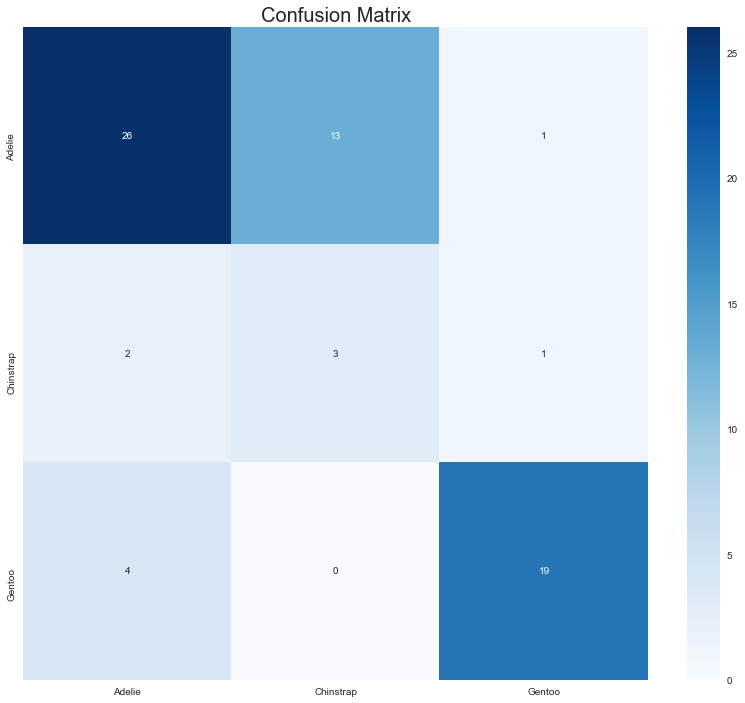

In [41]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(test['predictions'], test['species'])



#seaborn heatmap to visualise confusion matrix
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix',fontsize=20);


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
ax.yaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
plt.show();

* using all variables in the model, there are now four *Adelie* misclassed as *Gentoo* and two as *Chinstrap*
* Using two variables there was no *Adelie* classified as *Gentoo* for example 

#### k-Fold Cross-Validation

* Cross-validation is when the dataset is randomly split up into ‘k’ groups. 
* One of the groups is used as the test set and the rest are used as the training set. 
* The model is trained on the training set and scored on the test set. 
* Then the process is repeated until each unique group as been used as the test set.
* For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set.

* The train-test-split method we used in earlier is called ‘holdout’. 
* Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. * Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

* In order to train and test our model using cross-validation, we will use the ‘cross_val_score’ function with a cross-validation value of 5. * ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. 
* We will save the accuracy scores in the ‘cv_scores’ variable.
* To find the average of the 5 scores, we will use numpy’s mean function, passing in ‘cv_score’. Numpy is a useful math library in Python.

In [42]:
#create a new KNN model
knn_cv = KNeighborsClassifier()

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, inputs, outputs, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.74545455 0.8        0.8        0.72727273 0.81818182]
cv_scores mean:0.7781818181818183


* Using cross-validation, our mean score is about 78%. 
* This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

#### Hypertuning model parameters using GridSearchCV
* When built our initial k-NN model, we set the parameter ‘n_neighbors’ to 5 (default) as a starting point with no real logic behind that choice.
* Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. 
* In our case, we will use GridSearchCV to find the optimal value for ‘n_neighbors’.
* GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.
* For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model. 
* To do this, we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 31.
* Our new model using grid search will take in a new k-NN classifier, our param_grid and a cross-validation value of 5 in order to find the optimal value for ‘n_neighbors’.

In [43]:
#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 31)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

#fit model to data
knn_gscv.fit(inputs, outputs)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

* After training, we can check which of our values for ‘n_neighbors’ that we tested performed the best. 
* To do this, we will call ‘best_params_’ on our model.

In [44]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

* We can see that 1 is the optimal value for ‘n_neighbors’. 
* We can use the ‘best_score_’ function to check the accuracy of our model when ‘n_neighbors’ is 1. ‘best_score_’ outputs the mean accuracy of the scores obtained through cross-validation.

In [45]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8472727272727273

In [46]:
#create variables for different results
knn_params = knn_gscv.cv_results_['params']
rank_test_score = knn_gscv.cv_results_['rank_test_score']
mean_test_score = knn_gscv.cv_results_['mean_test_score']

* A dataframe is created to store the cross validation results

In [47]:
res = pd.DataFrame(knn_params)
res['Rank Score'] = rank_test_score
res['Mean Score'] = mean_test_score

print(res[res['Mean Score']==res['Mean Score'].max()])


   n_neighbors  Rank Score  Mean Score
0            1           1    0.847273


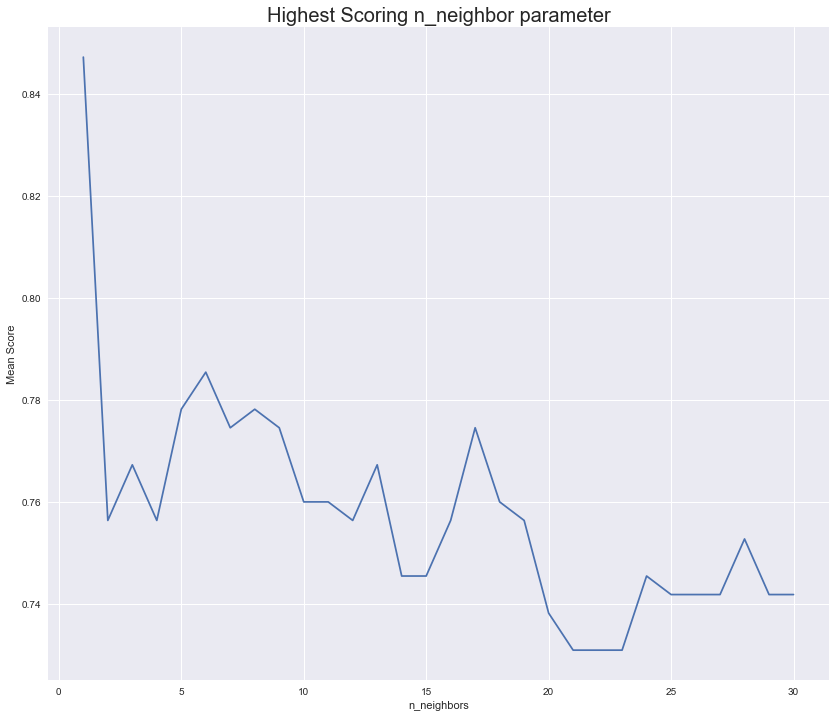

In [48]:
#lineplot of model scores based on different parameters
sns.lineplot(y='Mean Score',x='n_neighbors',data=res).set_title('Highest Scoring n_neighbor parameter',fontsize=20);

* Observing the above plot, we see that the highest score *n_neighbor* is 1

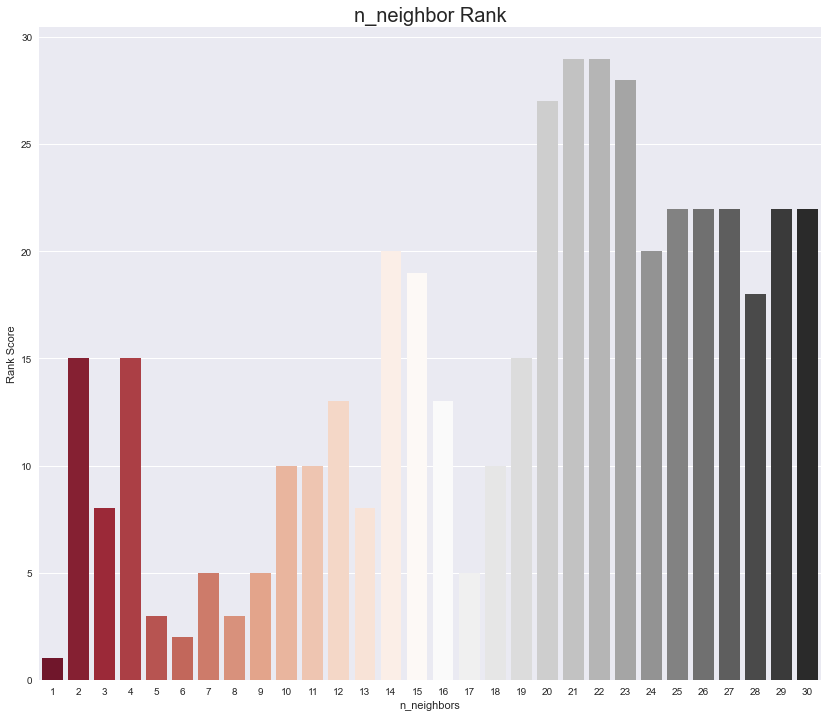

In [49]:
#barplot of rank value of each parameter
sns.barplot(y='Rank Score',x='n_neighbors',data=res,palette='RdGy').set_title('n_neighbor Rank',fontsize=20);

* We can observefrom the barplot above that *n_neighbor* 1 is ranked in 1st place

### KNN nearest neighbours Iris

* we can repeat the same steps to run a KNN model with the Iris dataset

* load in iris data set

In [50]:
#load iris dataset
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/master/iris.csv")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

* visualise with pairplot, hue being species

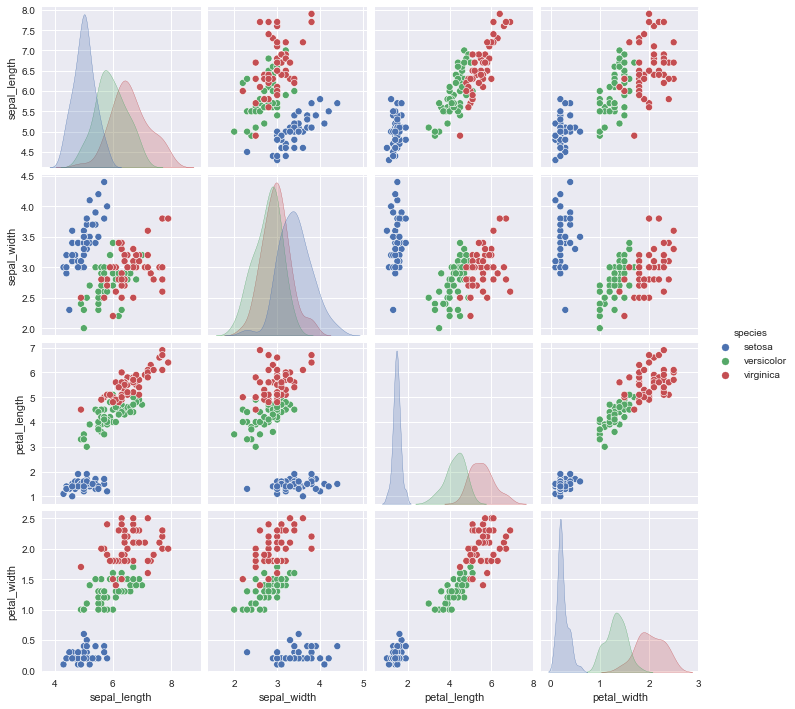

In [51]:
sns.pairplot(df,hue="species");

### Inputs and Outputs

* Data being split up into inputs and targets. 
* The species type is what is trying to be predicted. 
* This is takien out of the main dateaet simailar to the article above based on doabetes data

In [52]:
inputs= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['species']

### Classifier

In [53]:
knn = KNeighborsClassifier()

### Train data

In [54]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs,outputs,test_size=0.2, random_state=42)#,stratify=outputs)

#### Fit Model

In [55]:
knn.fit(inputs_train,outputs_train)

KNeighborsClassifier()

#### Evaluate

In [56]:
(knn.predict(inputs_test) == outputs_test).sum()


30

In [57]:
(knn.predict(inputs_test) == outputs_test).value_counts()
df['pred'] =knn.predict(inputs)
df['c'] = df['species'] == df['pred']
(df['species'] == df['pred']).sum()
df.loc[df['c']==False]

sepal_length  sepal_width  petal_length  petal_width     species  \
70            5.9          3.2           4.8          1.8  versicolor   
72            6.3          2.5           4.9          1.5  versicolor   
83            6.0          2.7           5.1          1.6  versicolor   
106           4.9          2.5           4.5          1.7   virginica   

           pred      c  
70    virginica  False  
72    virginica  False  
83    virginica  False  
106  versicolor  False

### k-Fold Cross-Validation

In [58]:
#create a new KNN model
knn_cv = KNeighborsClassifier()

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, inputs,outputs, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 1.         0.93333333 0.96666667 1.        ]
cv_scores mean:0.9733333333333334


### GridSearch

In [59]:
#create new a knn model
knn3 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 31)}
#use gridsearch to test all values for n_neighbors

knn_gscv = GridSearchCV(knn3, param_grid, cv=5)

#fit model to data
knn_gscv.fit(inputs,outputs)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

#### Best value to use

In [60]:
knn_gscv.best_params_

{'n_neighbors': 6}

* n_neightbour value of 6 the optium value to use post cross validation

In [61]:
knn_gscv.best_score_

0.9800000000000001

In [62]:
#create variables for different results
knn_params = knn_gscv.cv_results_['params']
rank_test_score = knn_gscv.cv_results_['rank_test_score']
mean_test_score = knn_gscv.cv_results_['mean_test_score']

In [63]:
res = pd.DataFrame(knn_params)
res['Rank Score'] = rank_test_score
res['Mean Score'] = mean_test_score

print(res[res['Mean Score']==res['Mean Score'].max()])
#res[res.groupby(['n_neighbors'])['Mean Score'].transform(max) == res['Mean Score']].set_index('n_neighbors')


    n_neighbors  Rank Score  Mean Score
5             6           1        0.98
6             7           1        0.98
9            10           1        0.98
10           11           1        0.98
11           12           1        0.98


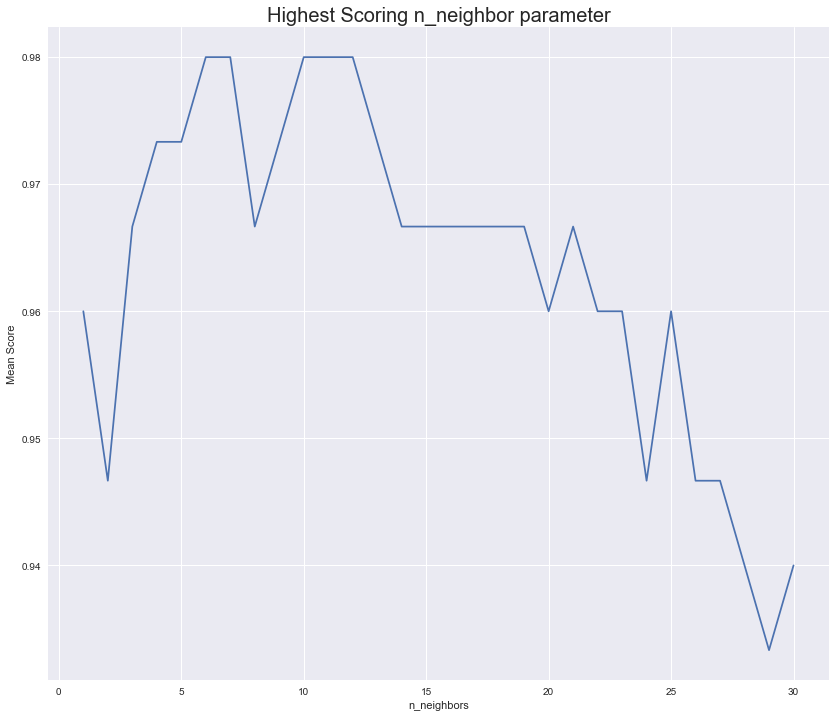

In [64]:
sns.lineplot(y='Mean Score',x='n_neighbors',data=res).set_title('Highest Scoring n_neighbor parameter',fontsize=20);

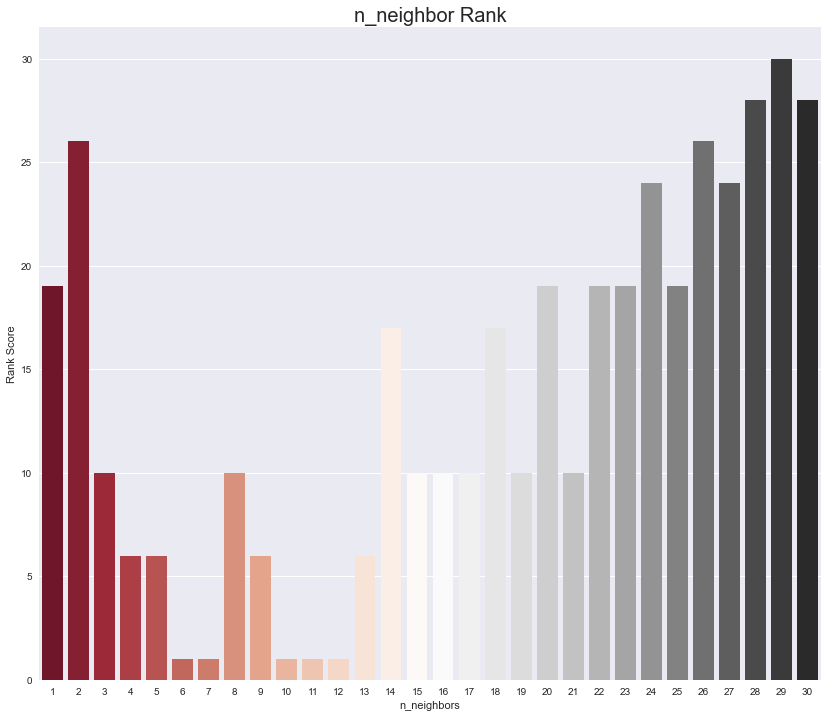

In [65]:
sns.barplot(y='Rank Score',x='n_neighbors',data=res,palette='RdGy').set_title('n_neighbor Rank',fontsize=20);

* With the iris datset, the best paramter for *n_neighbors* is 6. However 7,10,11 and 12 return approx the same mean score

***

## Regression

***

### Simple Linear Regression

$$ y = 2 x + 1$$

The number $m$ is the slope if the line. The slope is how much $y$ increases by when $x$ is increased by 1.0. The $c$ is the y-intercept of the line. It is the value of $y$ when $x$ is at zero.

A simple linear regression estimates the relationship between the values. In the following dataset this is speed and power. Performing a linear regression on this dataset we can identify how strong the relationship is between these two variables. Power is dependent on Speed (independent).

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
***

##### Read in Dataset

In [66]:
#import dataset
ps = pd.read_csv('datasets/powerproduction.txt')

##### Summary Stats of Dataset

In [67]:
#summarry statistics
ps.describe()

speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000

##### Data types in dataset

In [68]:
#datatypes
ps.dtypes

speed    float64
power    float64
dtype: object

##### Shape of dataset

- 500 rows and two columns

In [69]:
#dataframe shape
ps.shape

(500, 2)

##### Plotting the Data

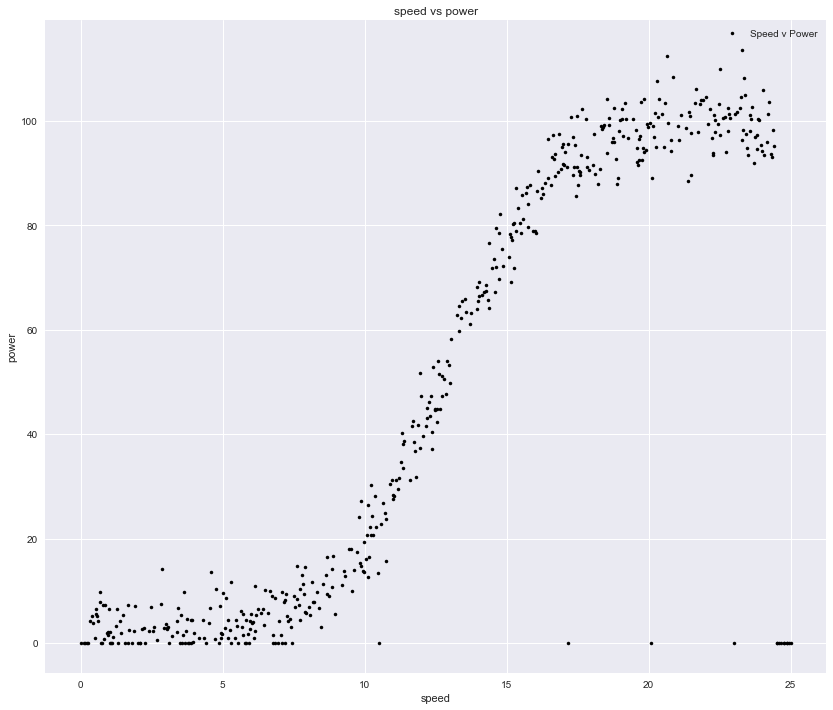

In [70]:
#plotting the dataset
plt.plot(ps['speed'],ps['power'],'.',color='black',label = 'Speed v Power')
plt.title(f'{ps.columns[0]} vs {ps.columns[1]}')
plt.xlabel(f'{ps.columns[0]}')
plt.ylabel(f'{ps.columns[1]}')
plt.legend();

##### Split up the dataset into inputs and targets

In [71]:
#import numpy as np
X = ps['speed'].values
y = ps['power'].values



X = X.reshape(-1, 1)


##### Split data into training and test sets

- 20% of the data held back in test dataset

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .2,random_state=1)

In [73]:
print(f'Length of Training dataset is {len(X_train)}')
print(f'Length of Test dataset is {len(X_test)}')
print(f'Together that sums up to the total length of the oroignal data set: {len(X_train)+len(X_test)}')

Length of Training dataset is 400
Length of Test dataset is 100
Together that sums up to the total length of the oroignal data set: 500


##### Fitting the model

In [74]:
model = lm.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

##### Model score and predictions

In [75]:
print(f'Model has an accuarcy score of {model.score(X_train, y_train)}')

y_pred = model.predict(X_test)

Model has an accuarcy score of 0.7494259815380628


In [76]:
#from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 16.85279938930505
Mean Squared Error: 627.2428554155053
R2 Score: 0.6456959019133406


##### For comparison Dataframe

In [77]:
m1_score = model.score(X_train, y_train)
m1_mae = metrics.mean_absolute_error(y_test,y_pred)
m1_mse = metrics.mean_squared_error(y_test,y_pred)
m1_r2 = metrics.r2_score(y_test,y_pred)
m1_rmse = np.sqrt(m1_mse)

##### Fitting Best Line

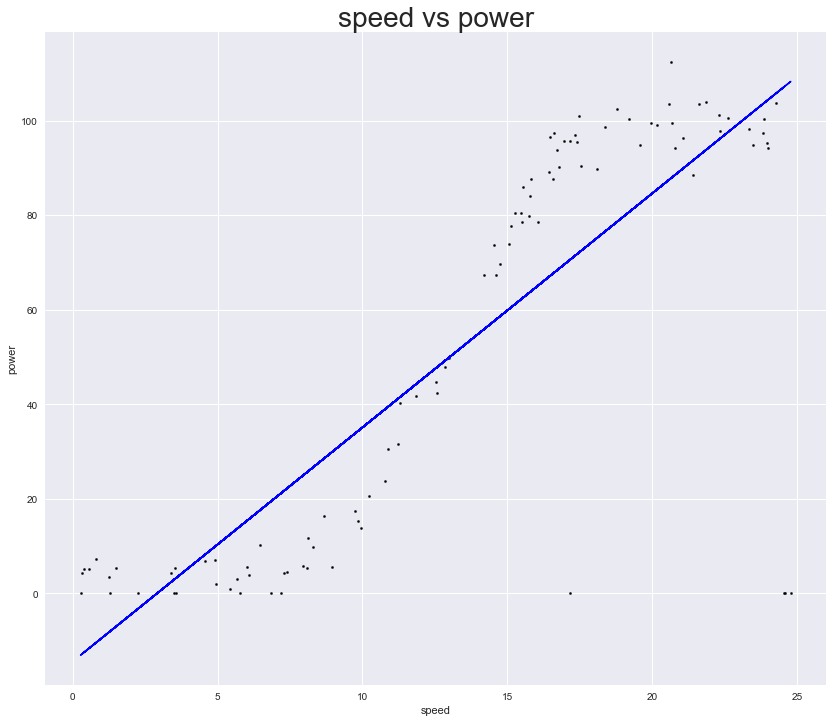

In [78]:
plt.scatter(X_test,y_test,color='black',s=5)
plt.plot(X_test,y_pred,color='blue',linewidth=1.5)
plt.title(f'{ps.columns[0]} vs {ps.columns[1]}',fontsize=28)
plt.xlabel(f'{ps.columns[0]}')
plt.ylabel(f'{ps.columns[1]}');

#### Outliers

There are a number of zero values for power when speed is greater than zero. We may view these as outliers, incorrect measurements or some anomoly in the data. We will fit a line with and without these values and look at the comparison. A new dataset will be created removing these outliers


In [79]:
#remove outliers
ps_c = ps[ps['power']!=0].reset_index()


##### Plot of data without zero values

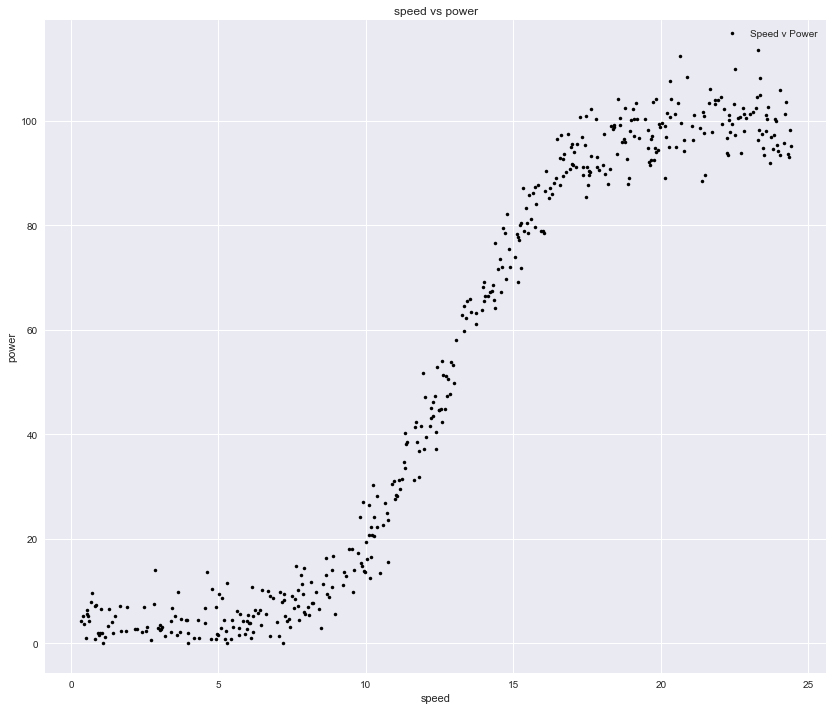

In [80]:
#plotting the dataset
plt.plot(ps_c['speed'],ps_c['power'],'.',color='black',label = 'Speed v Power')
plt.title(f'{ps_c.columns[1]} vs {ps_c.columns[2]}')
plt.xlabel(f'{ps_c.columns[1]}')
plt.ylabel(f'{ps_c.columns[2]}')
plt.legend();

##### Split up the dataset into inputs and targets

In [81]:
X = ps_c['speed'].values
y = ps_c['power'].values



X = X.reshape(-1, 1)
#y = y.reshape(-1,1)

##### Split data into training and test sets

- 20% of the data held back in test dataset

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20,random_state=1)

In [83]:
print(f'Length of Training dataset is {len(X_train)}')
print(f'Length of Test dataset is {len(X_test)}')
print(f'Together that sums up to the total length of the oroignal data set: {len(X_train)+len(X_test)}')

Length of Training dataset is 360
Length of Test dataset is 91
Together that sums up to the total length of the oroignal data set: 451


##### Fitting the model

In [84]:
model2 = lm.LinearRegression()

model2.fit(X_train, y_train)

LinearRegression()

##### Model score and predictions

In [85]:
print(f'Model has an accuarcy score of {model2.score(X_train, y_train)}')

y_pred = model2.predict(X_test)
tpred = model2.predict([[20]])
tpred

Model has an accuarcy score of 0.8999143665071773


array([91.79892383])

In [86]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 11.41084222871987
Mean Squared Error: 173.7351153383961
R2 Score: 0.8863631589082979


In [87]:
compare = pd.DataFrame({'actual':y_test,'predicted':y_pred})

##### For comparison Dataframe

In [88]:
m2_score = model2.score(X_train, y_train)
m2_mae = metrics.mean_absolute_error(y_test,y_pred)
m2_mse = metrics.mean_squared_error(y_test,y_pred)
m2_r2 = metrics.r2_score(y_test,y_pred)
m2_rmse = np.sqrt(m2_mse)
print(m2_rmse)

13.180861706974856


##### Fitting Best Line

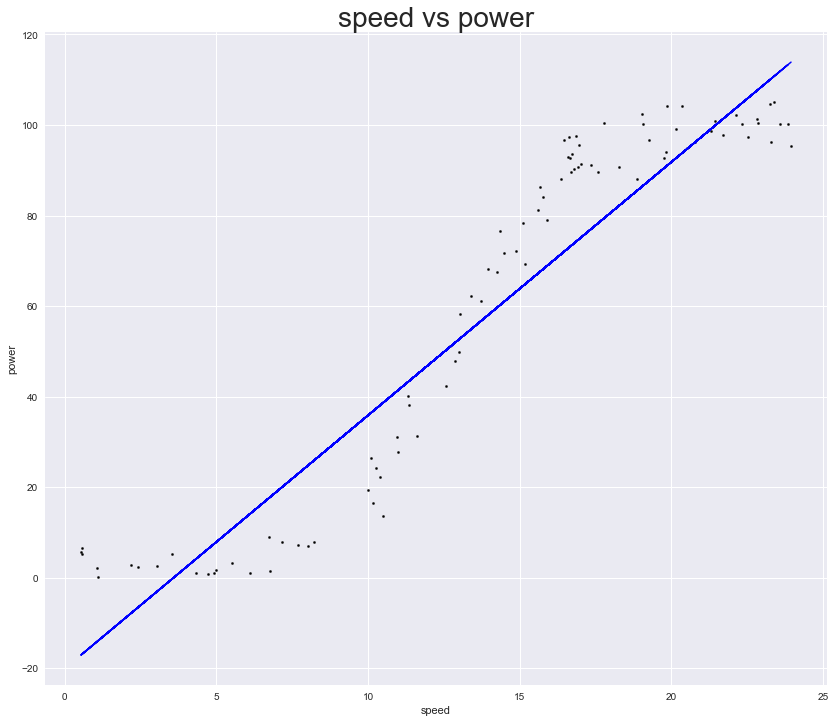

In [89]:
plt.scatter(X_test,y_test,color='black',s=5)
plt.plot(X_test,y_pred,color='blue',linewidth=1.5)
plt.title(f'{ps_c.columns[1]} vs {ps_c.columns[2]}',fontsize=28)
plt.xlabel(f'{ps_c.columns[1]}')
plt.ylabel(f'{ps_c.columns[2]}');

#### Comparison Dataframe of Models

In [90]:
#create df to store results of each model for comparison visualisation
compare_df = pd.DataFrame(columns = ['Model Score','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R-squared'])

In [91]:
compare_df = compare_df.append({'Model Score':m1_score,'Mean Absolute Error':m1_mae,'Mean Squared Error':m1_mse,'Root Mean Squared Error':m1_rmse,'R-squared':m1_r2,'Model':'All Data'},ignore_index=True)
compare_df = compare_df.append({'Model Score':m2_score,'Mean Absolute Error':m2_mae,'Mean Squared Error':m2_mse,'Root Mean Squared Error':m2_rmse,'R-squared':m2_r2,'Model':'Outliers Removed'},ignore_index=True)

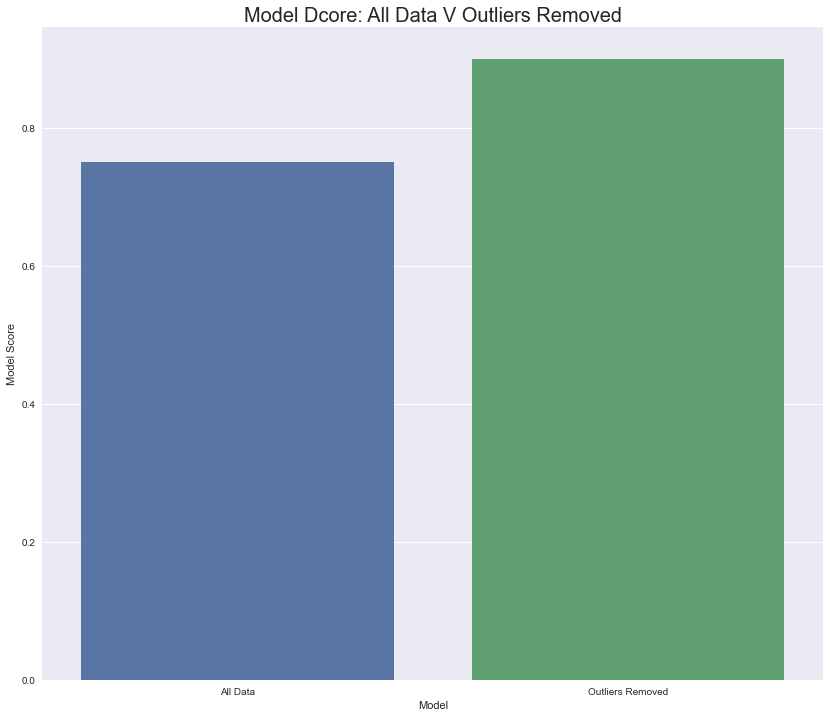

In [92]:
#model score compare
sns.barplot(x='Model',data=compare_df,y='Model Score');
plt.title('Model Dcore: All Data V Outliers Removed',fontsize=20);

* Significant increase in model score when Outliers removed

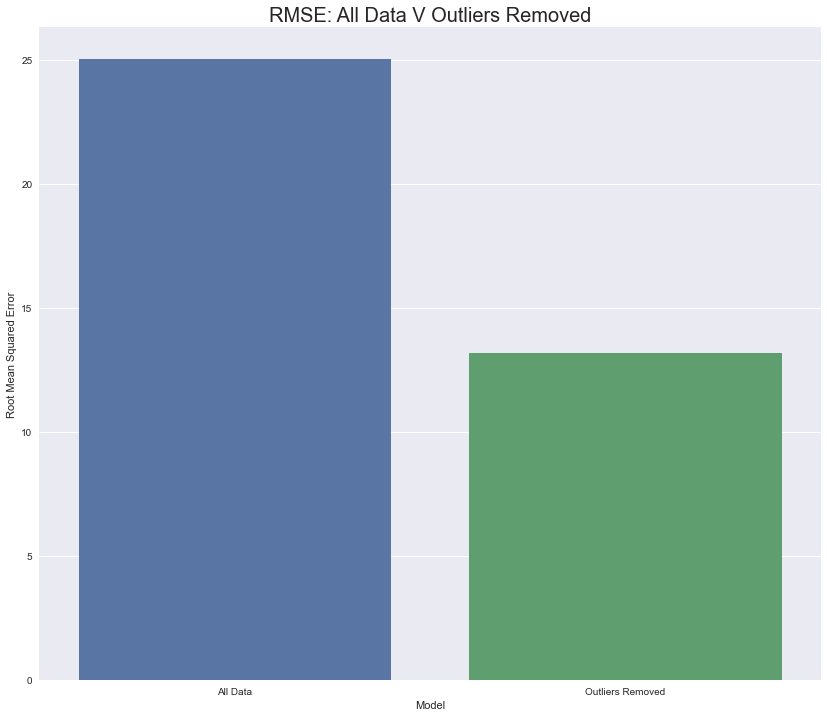

In [93]:
#Root Mean Squared Error compare
sns.barplot(x='Model',data=compare_df,y='Root Mean Squared Error');
plt.title('RMSE: All Data V Outliers Removed',fontsize=20);

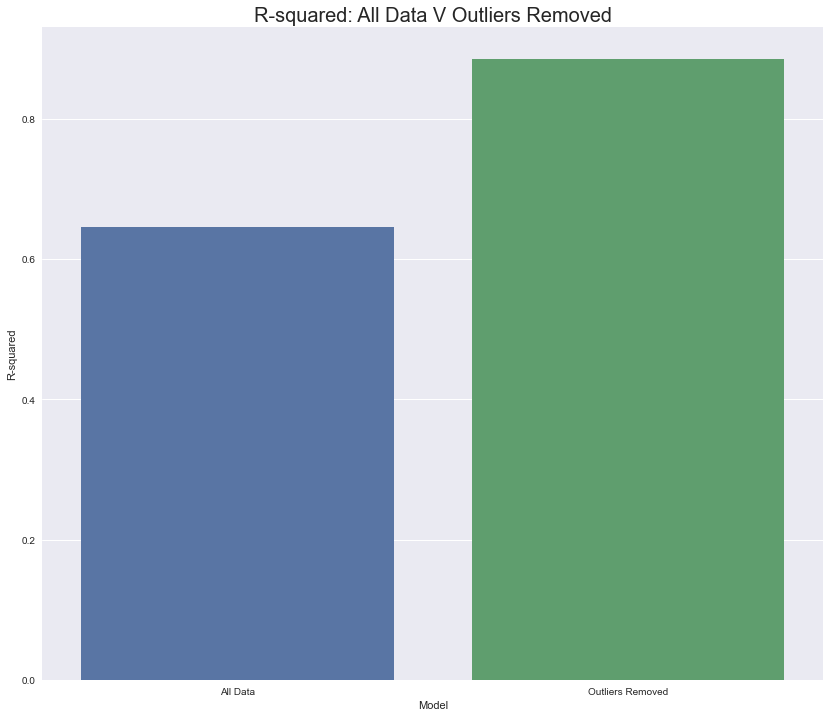

In [94]:
#R-Squared compare
sns.barplot(x='Model',data=compare_df,y='R-squared')
plt.title('R-squared: All Data V Outliers Removed',fontsize=20);

<br>

***

### Multiple Linear Regression

#### Dataset

* Combined Cycle Power Plant Data Set
* https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

##### Attribute Information
1. Hourly average ambient variables
2. Temperature (T) in the range 1.81°C and 37.11°C,
3. Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
4. Relative Humidity (RH) in the range 25.56% to 100.16%
5. Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
6. Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. 


#### Reading in dataset

In [95]:
#dataset import
df = pd.read_csv('Datasets/cycle_power_plant.csv',sep=',')

#eyeball first 10 rows
df.head()

AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

#### summary statistics

In [96]:
df.describe()

AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

In [97]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

#### Visualisation of Dataset

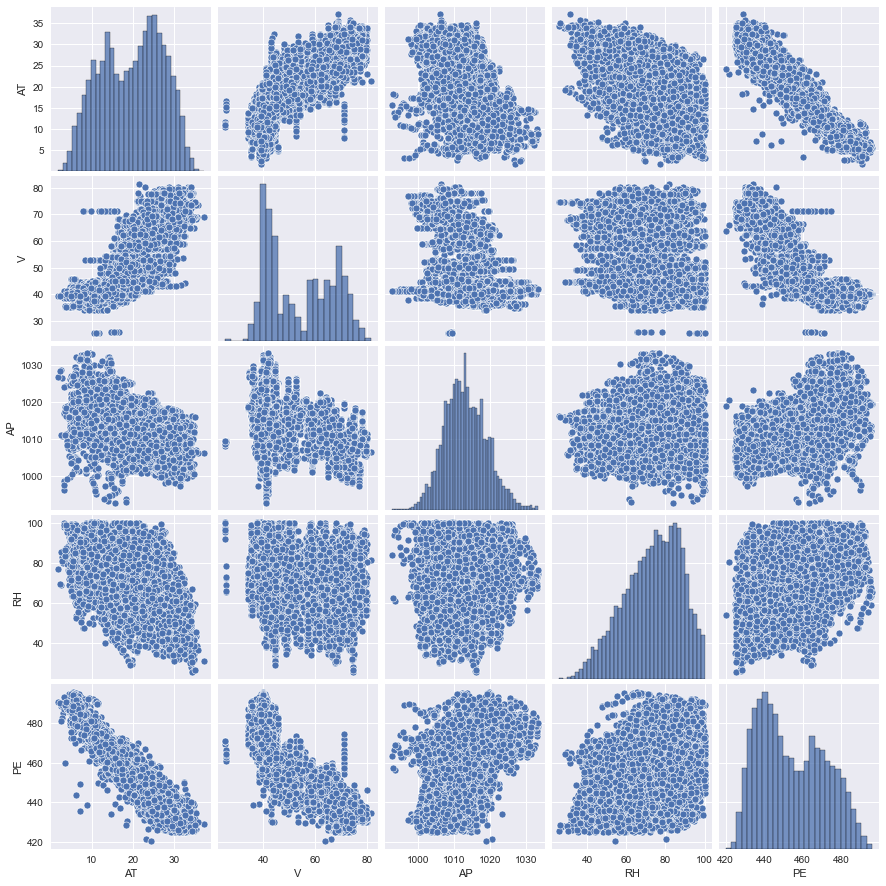

In [98]:
sns.pairplot(df);

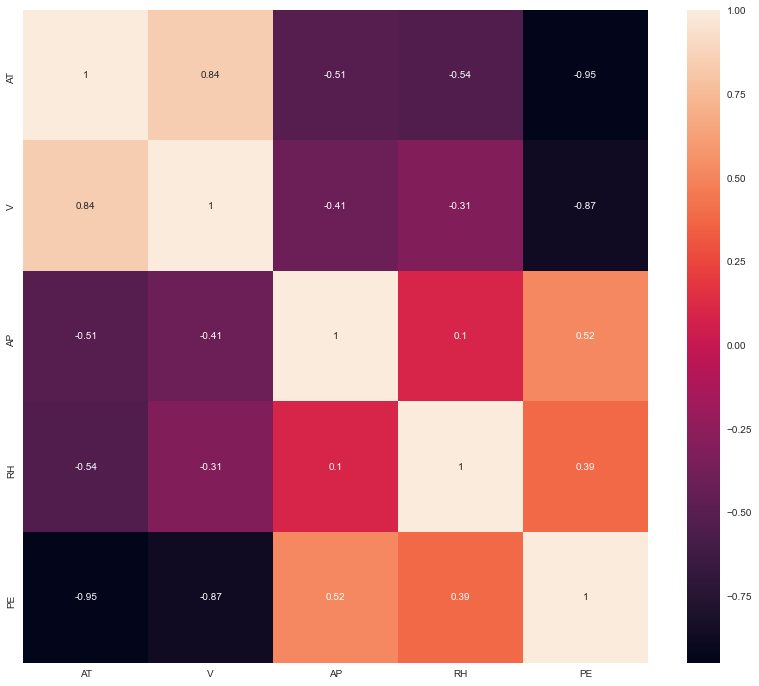

In [99]:
sns.heatmap(df.corr(),annot=True);

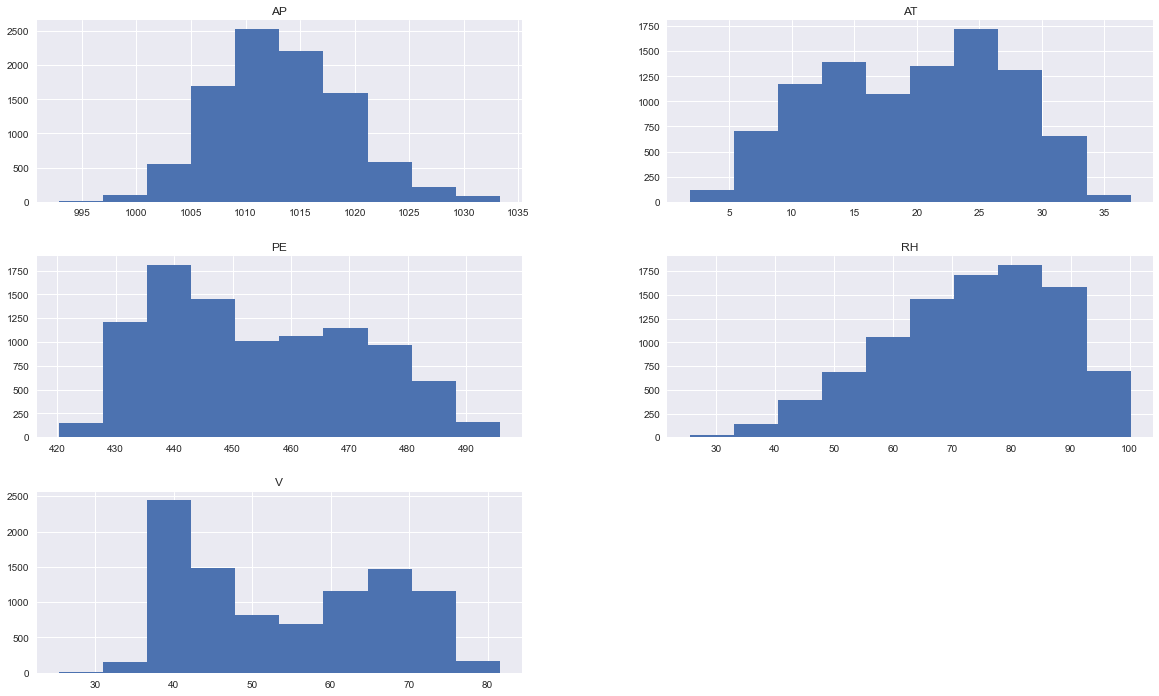

In [100]:
# Histograms
df.hist(bins=10,figsize=(20,12));

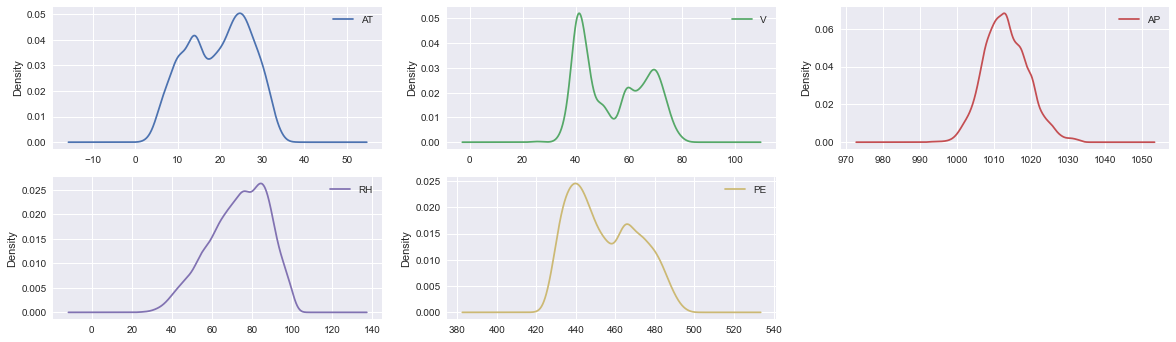

In [101]:
# Density
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False,figsize=(20,12));

#### Define Inputs and Outputs

* x independent variables
* y dependent variable

In [102]:
#independent variables
x = df.drop(['PE'],axis=1).values

#dependent variable
y= df['PE'].values


#### Split the dataset into train and test data
Now we will split the dataset into into training data and testing data. The training data is the data that the model will learn from. The testing data is the data we will use to see how well the model performs on unseen data.

* 33% split applied this time

In [103]:
#from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#### Fitting the Model

In [104]:
model = lm.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

#### Predict Results

In [105]:
y_pred = model.predict(X_test)

#### Evaluate Model

In [106]:
m3_score = model.score(X_train, y_train)
m3_mae = metrics.mean_absolute_error(y_test,y_pred)
m3_mse = metrics.mean_squared_error(y_test,y_pred)
m3_r2 = metrics.r2_score(y_test,y_pred)
m3_rmse = np.sqrt(m3_mse)

print(f'Model has an accuarcy score of {m3_score}')
print(f'Model has an MAE of {m3_mae}')
print(f'Model has an MSE of {m3_mse}')
print(f'Model has an R2 score of {m3_r2}')
print(f'Model has an RMSE of {m3_rmse}')

Model has an accuarcy score of 0.9275275251774737
Model has an MAE of 3.5783052440171126
Model has an MSE of 20.114356686448268
Model has an R2 score of 0.9310173107097915
Model has an RMSE of 4.484903196998601


#### Plot Results

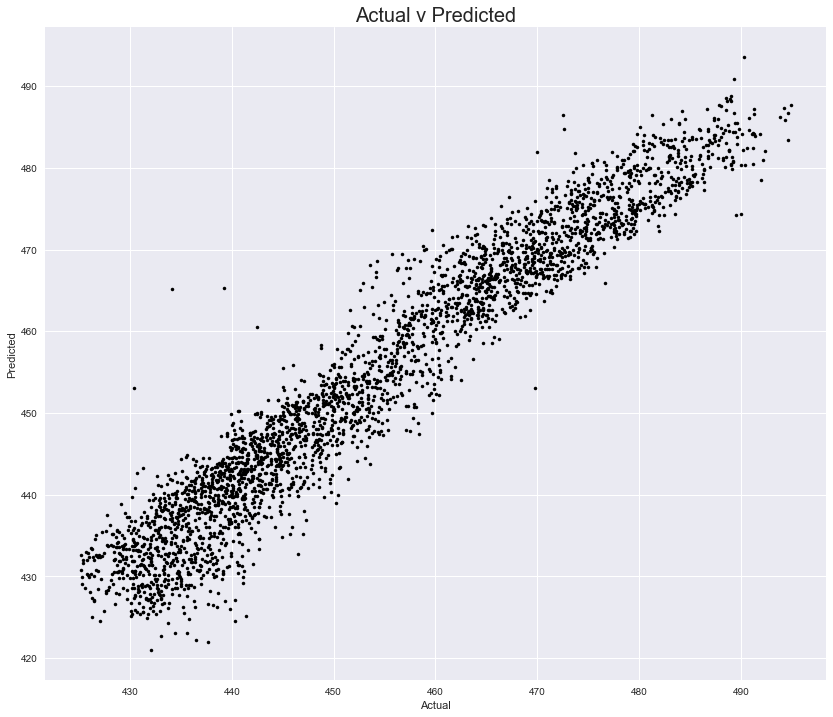

In [107]:
#new fig
fig, ax = plt.subplots()

#scatter plot
ax.plot(y_test,y_pred,'.',color='black')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual v Predicted',fontsize=20);

#### Comparison Dataframe

* Create data frame comparing actuals values from y_test to predicted values

In [108]:
pred_y_df=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred,'Difference':y_test-y_pred})
pred_y_df.head()

Actual Values  Predicted Values  Difference
0         431.23        431.397469   -0.167469
1         460.01        458.613068    1.396932
2         461.14        462.813293   -1.673293
3         445.90        448.618875   -2.718875
4         451.29        457.886495   -6.596495

#### Visualising Actuals v Predicted

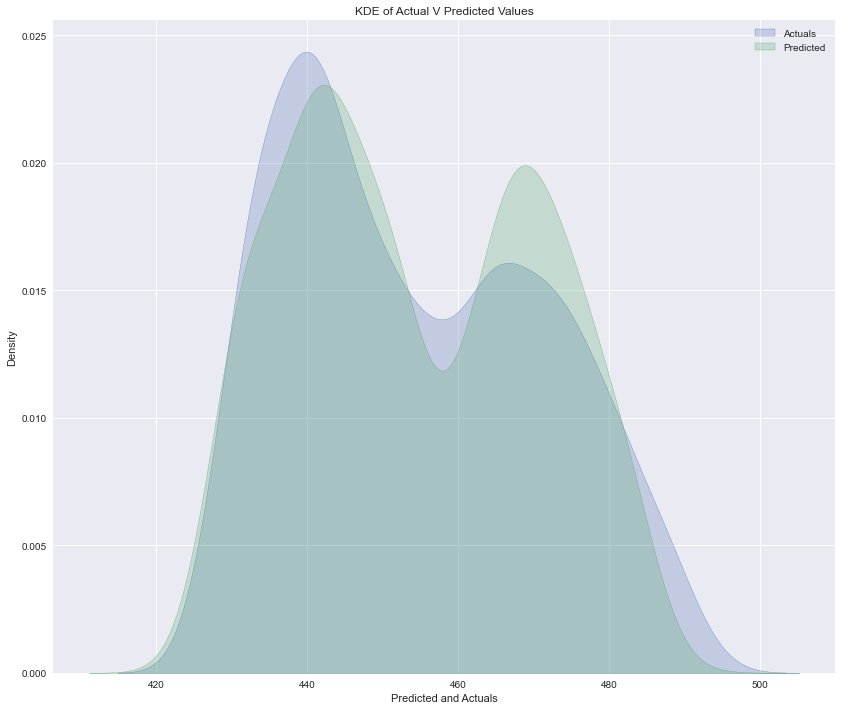

In [109]:
sns.kdeplot(pred_y_df['Actual Values'],fill =True,label='Actuals')
sns.kdeplot(pred_y_df['Predicted Values'],fill=True,label='Predicted');
plt.title('KDE of Actual V Predicted Values')
plt.xlabel('Predicted and Actuals')
plt.legend();

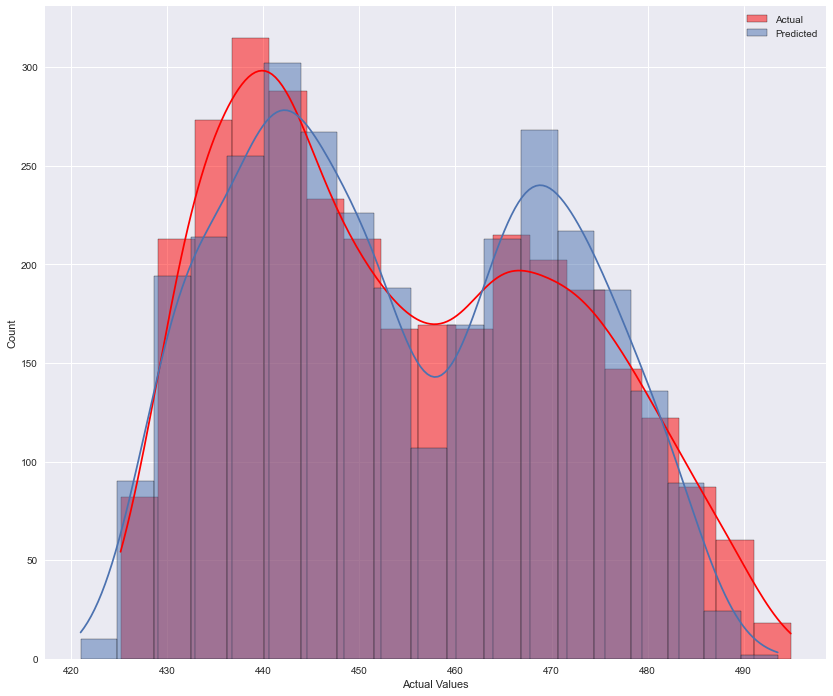

In [110]:
#Histogram and Density plot of Predicted Values and Sctual Values

sns.histplot(pred_y_df['Actual Values'],kde=True,color='r',label='Actual')


sns.histplot(pred_y_df['Predicted Values'],kde=True,label='Predicted')
plt.legend();

***
<br>

## Support Vector Machines
https://scikit-learn.org/stable/modules/svm.html

https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification

Different *kernel* parameters can be selected to determine the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane.

Non-linear classification can be implemented using the kernel trick. This enable inputs to be mapped into a higher dimensional space feature which in turn allows features to be linear seperable albeit in a higher plain.

*C* is a hypermeter in SVM to control error. A low C means low error and a large C means large error.

*gamma* is a hyperparameter which we have to set before training model. Gamma decides that how much curvature we want in a decision boundary. Gamma is not used for linear or polynomial kernels.
   * Gamma high means more curvature.
   * Gamma low means less curvature.
   
*degree* is a parameter when the poly kernel is used. It is the degree used to find the hyperplane to split the data 
   
We will explore the different parameters in different visualisations.




#### Example of Kernels
https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

In [111]:
#import iris datset from skleanr built in datasets
iris = datasets.load_iris()

##inputs
X = iris.data[:, :2] 

#outputs
y = iris.target

#function for plotting kernel examples 
#ref https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
def plotSVC(title):
    # create a mesh to plot in
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      h = (x_max / x_min)/100
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
      plt.subplot(1, 1, 1)
      Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.contourf(xx, yy, Z, cmap='Pastel2', alpha=0.8)
      plt.scatter(X[:, 0], X[:, 1], c=y)
      plt.xlim(xx.min(), xx.max())
      plt.title(title,fontsize=20)
      plt.show()

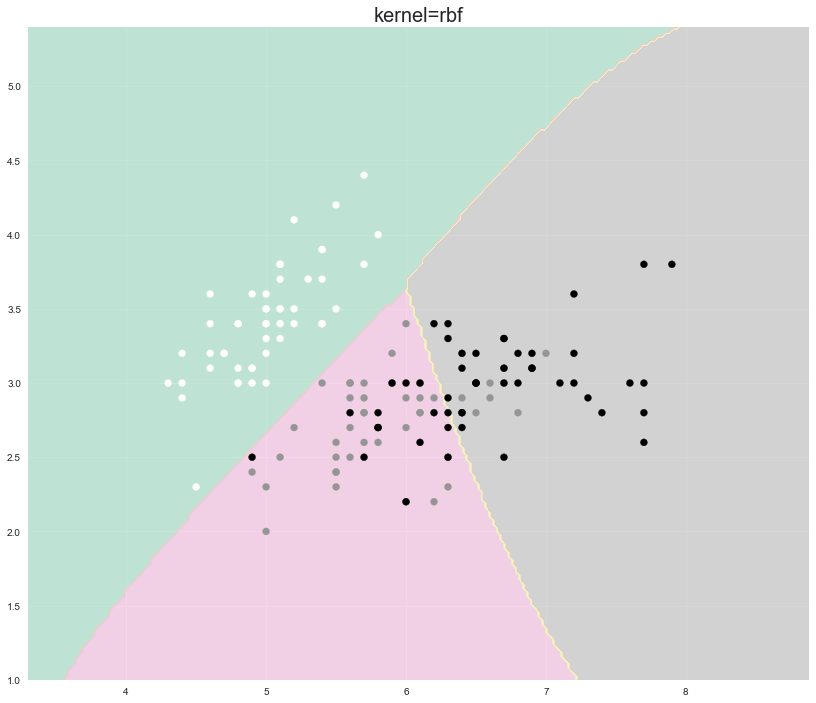

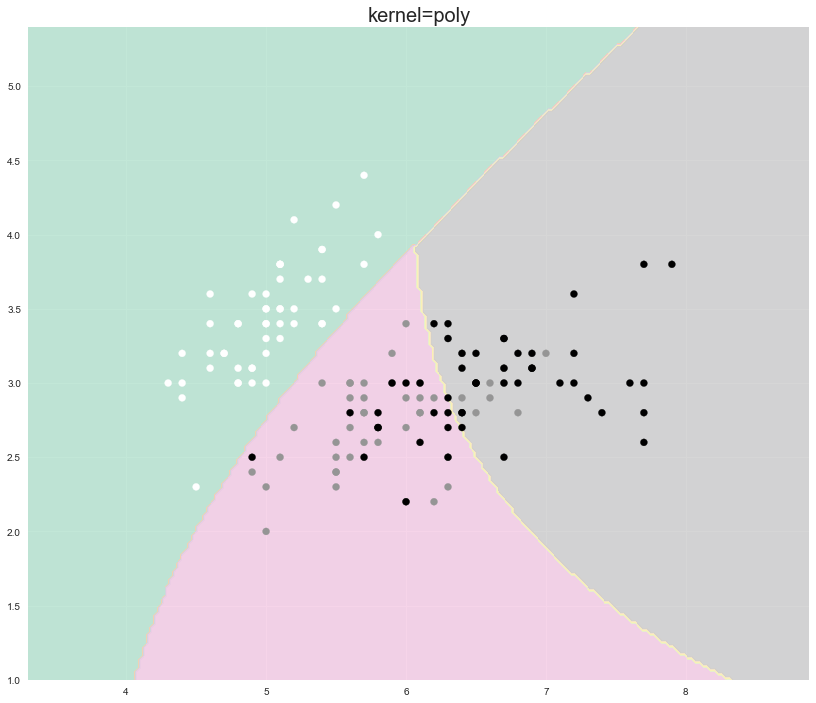

In [112]:
#plotting examples of different kernels
kernels = ['rbf', 'poly']
for kernel in kernels:
  svc = svm.SVC(kernel=kernel).fit(X, y)
  plotSVC('kernel=' + str(kernel))

#### Examples of dfferent *C* values



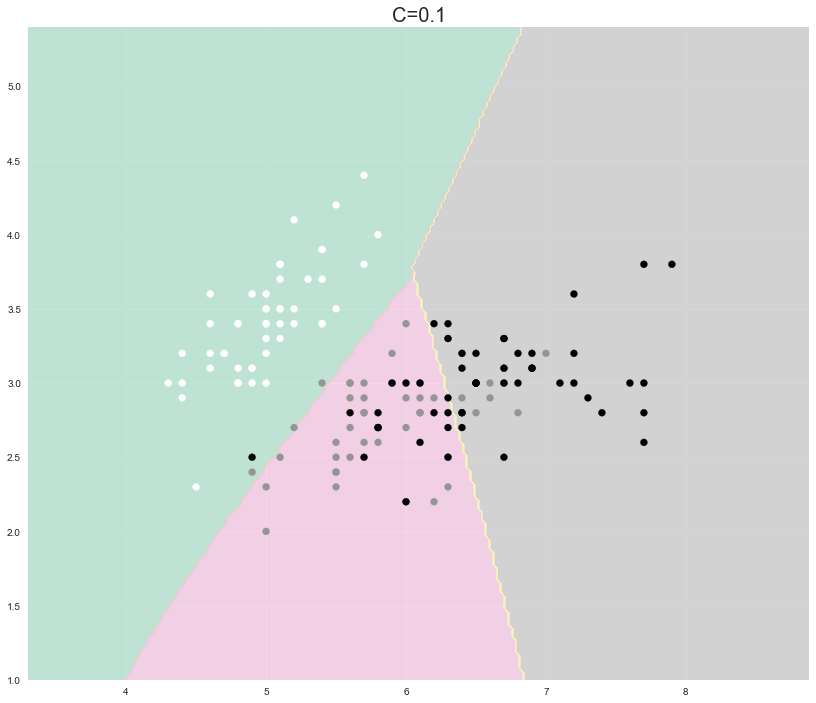

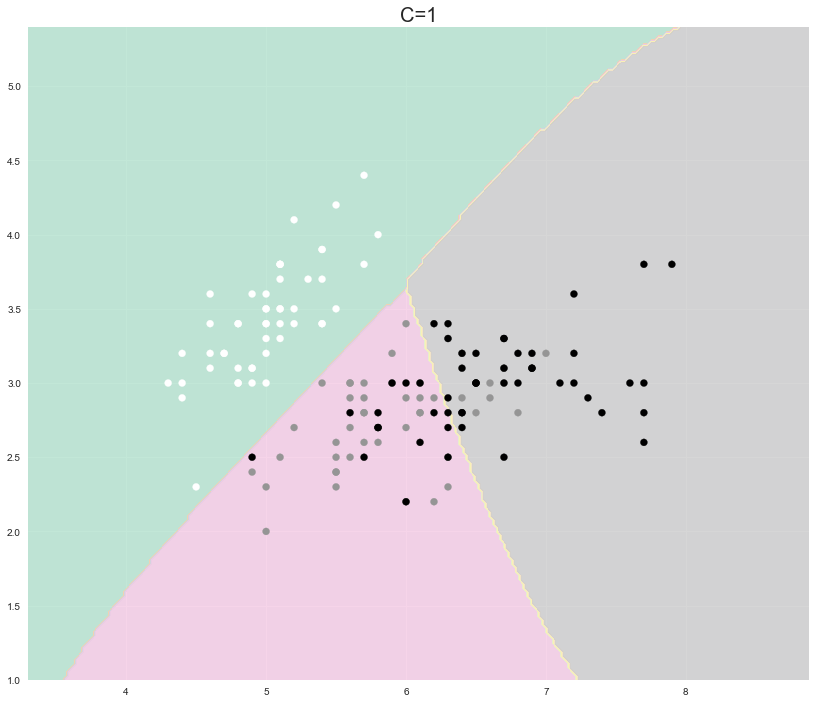

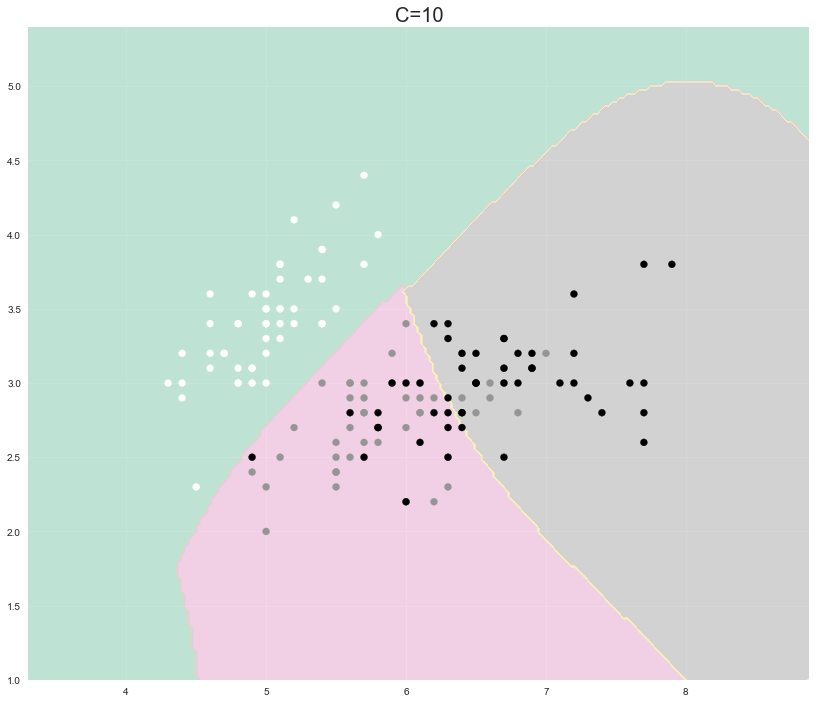

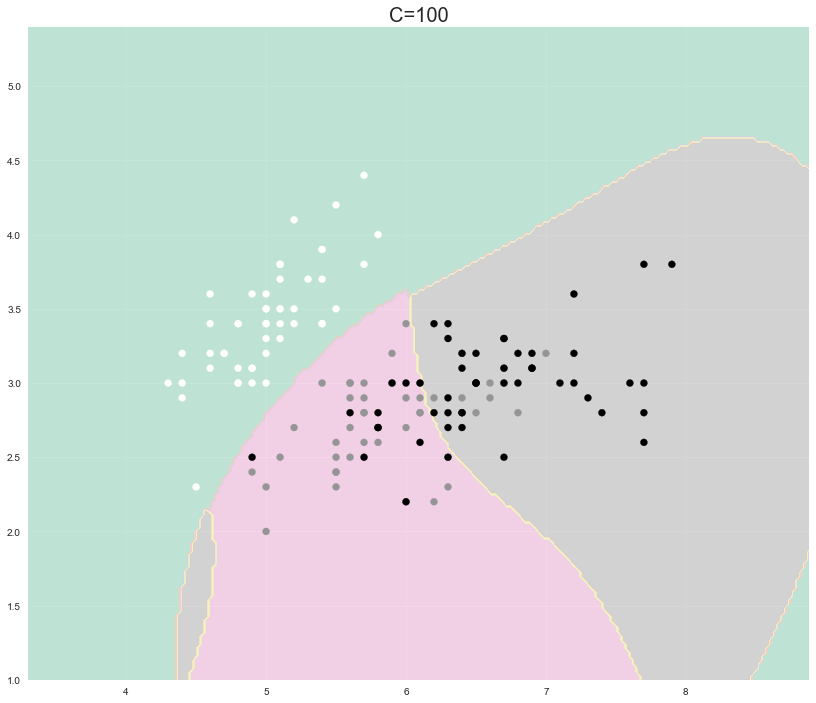

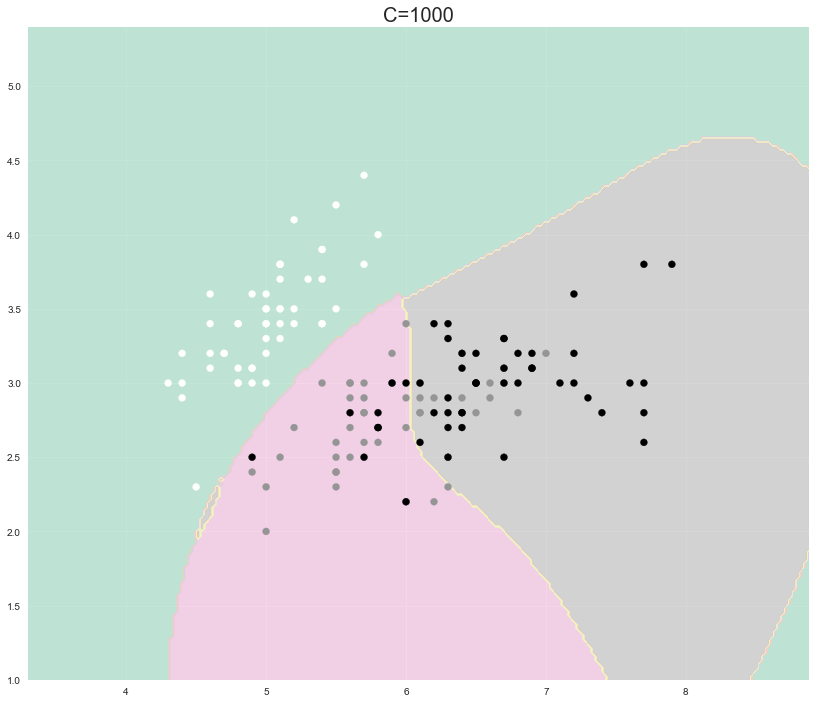

In [113]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
   svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
   plotSVC('C=' + str(c))

#### Examples of different *gamma* values

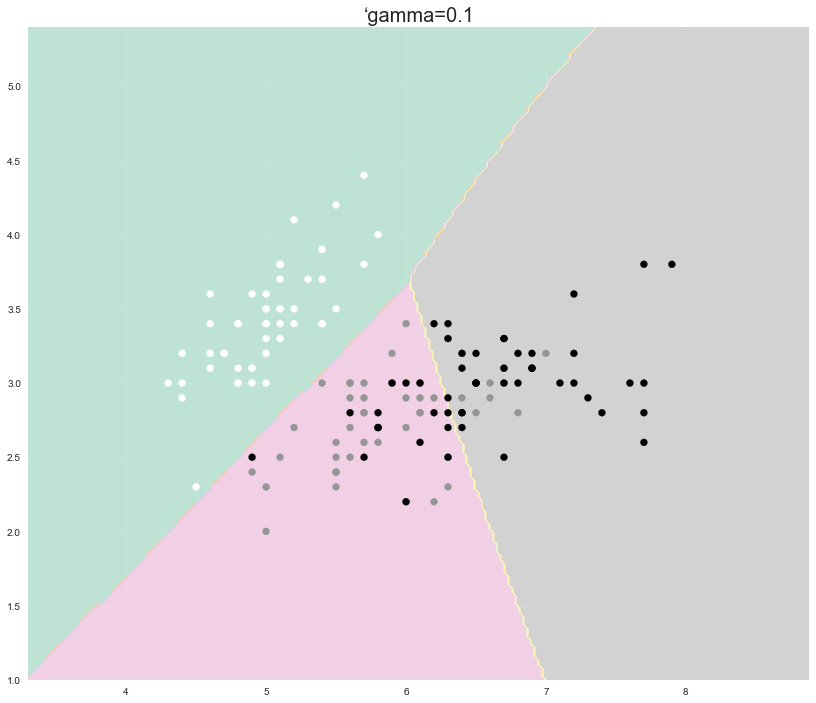

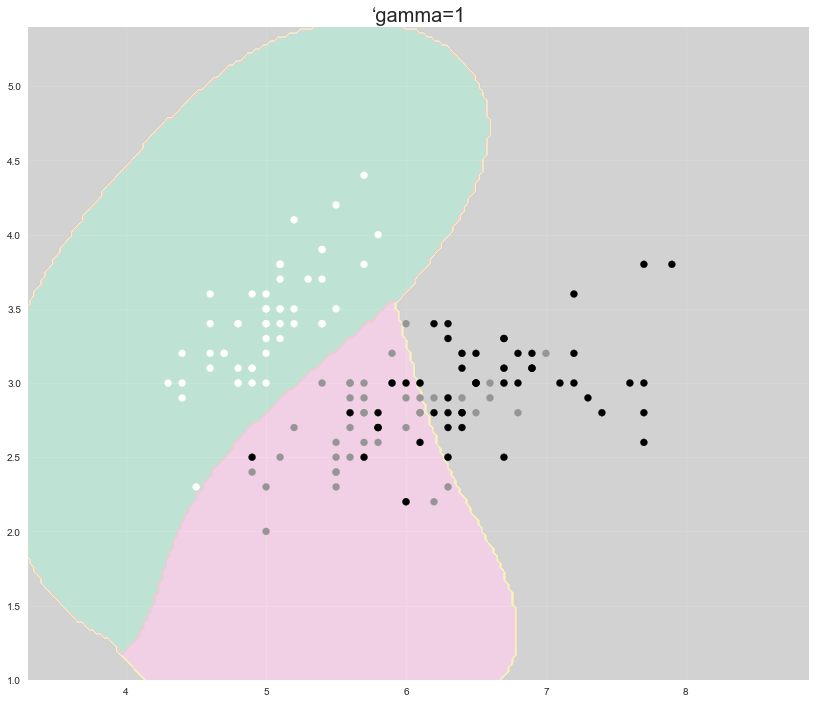

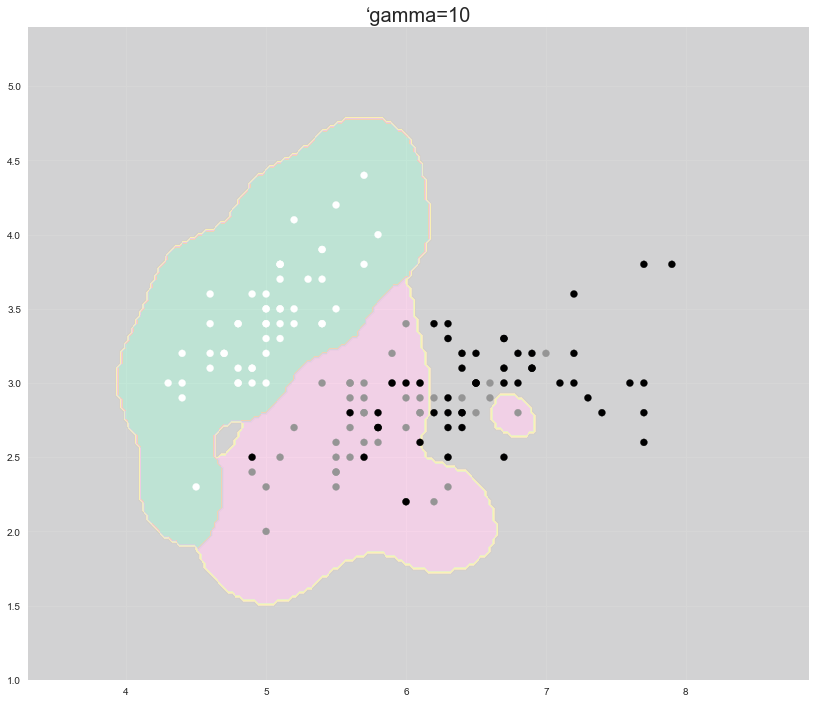

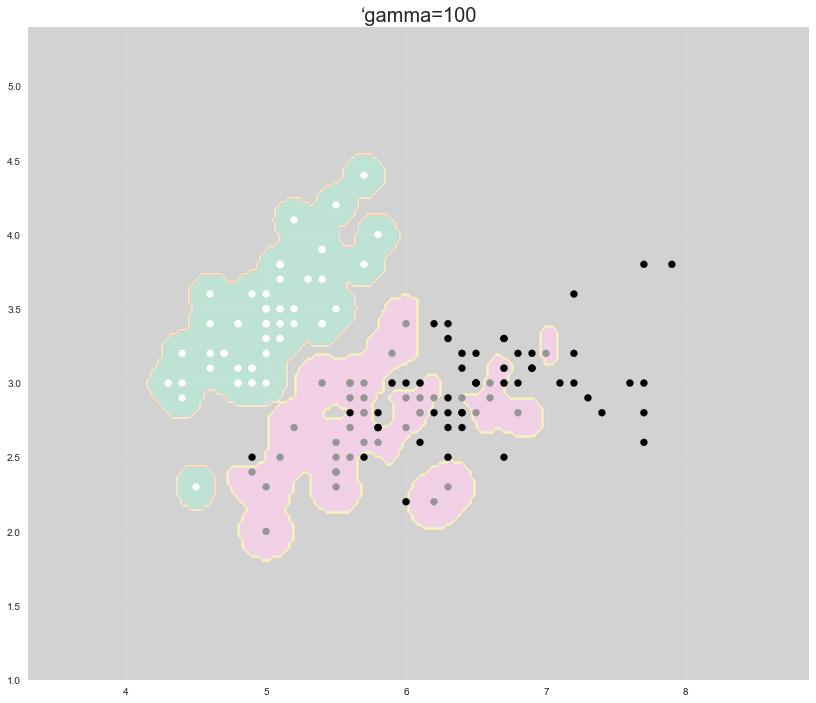

In [114]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
   svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
   plotSVC('‘gamma=' + str(gamma))

#### Examples of different polynomial degrees

* note setting the degree parameter to *1* is the same as using a *linear* kernel


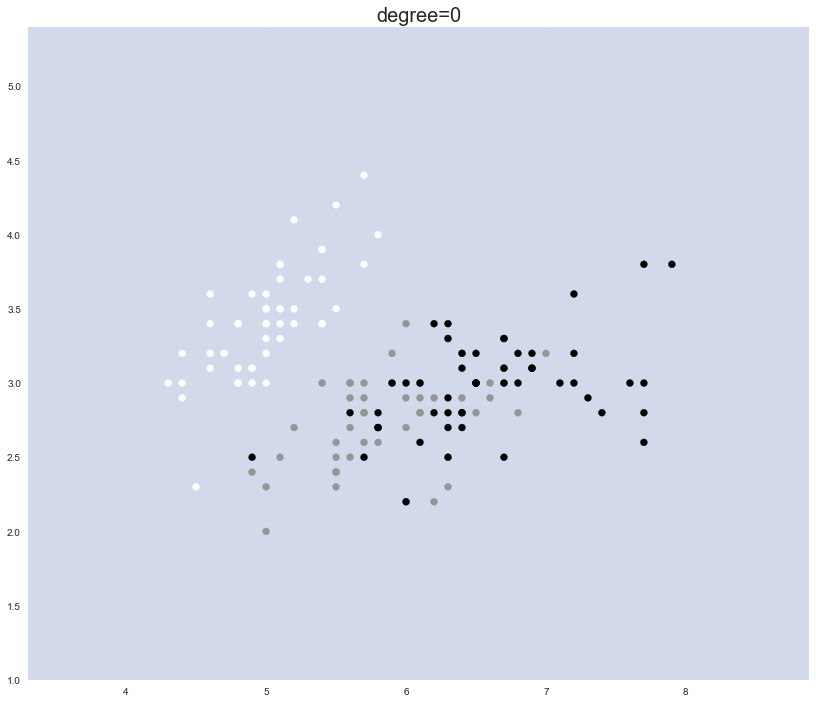

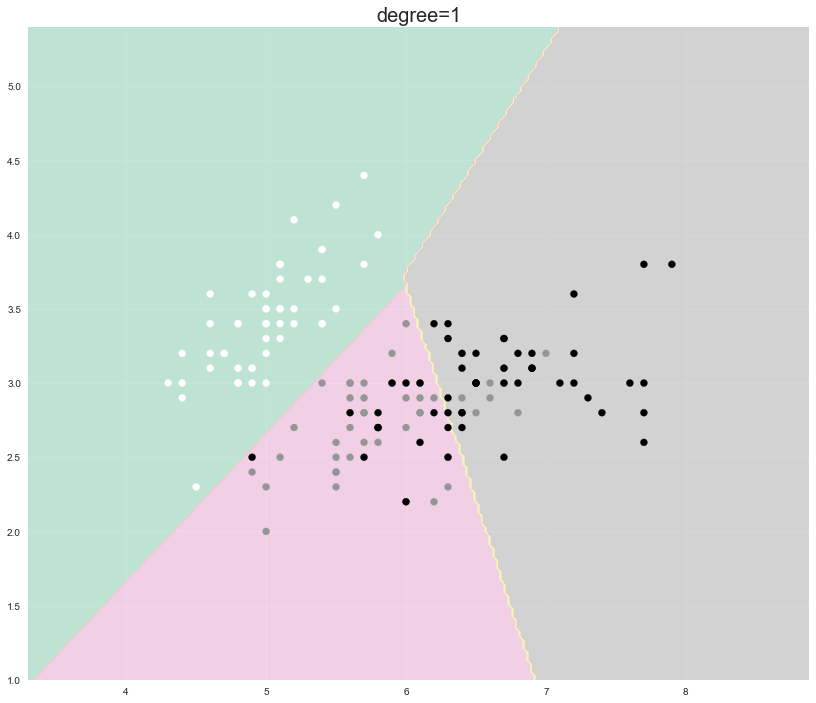

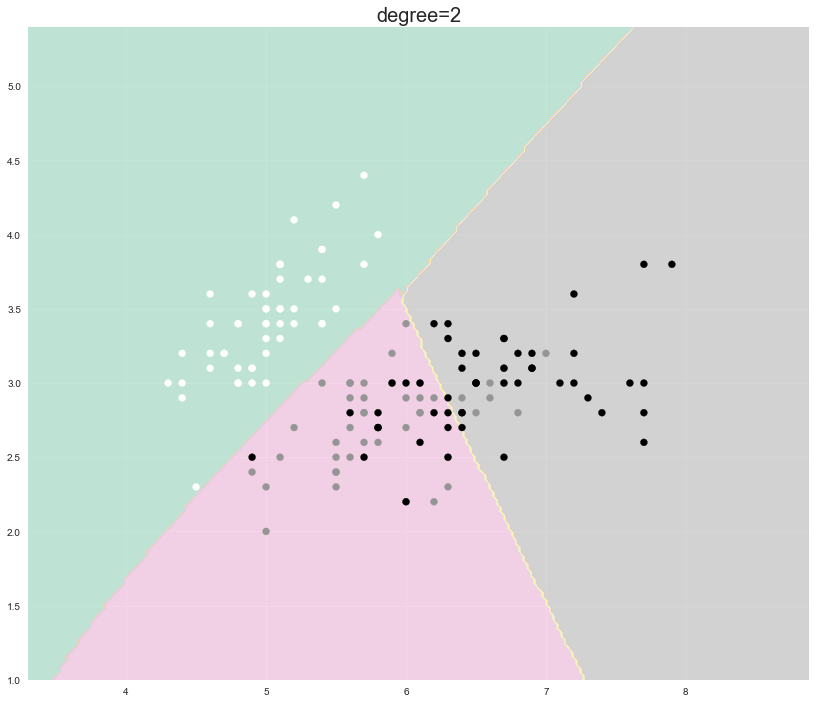

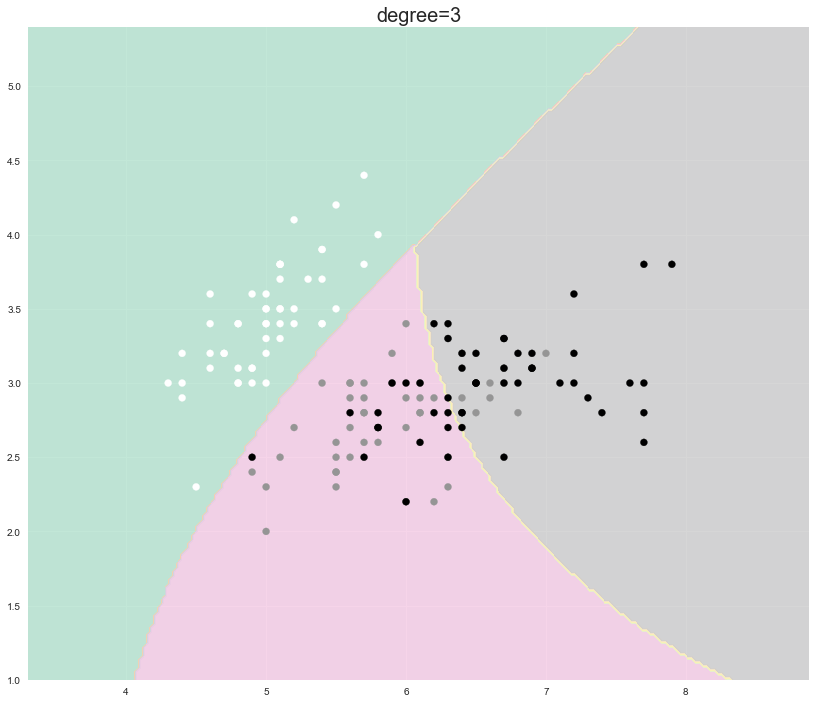

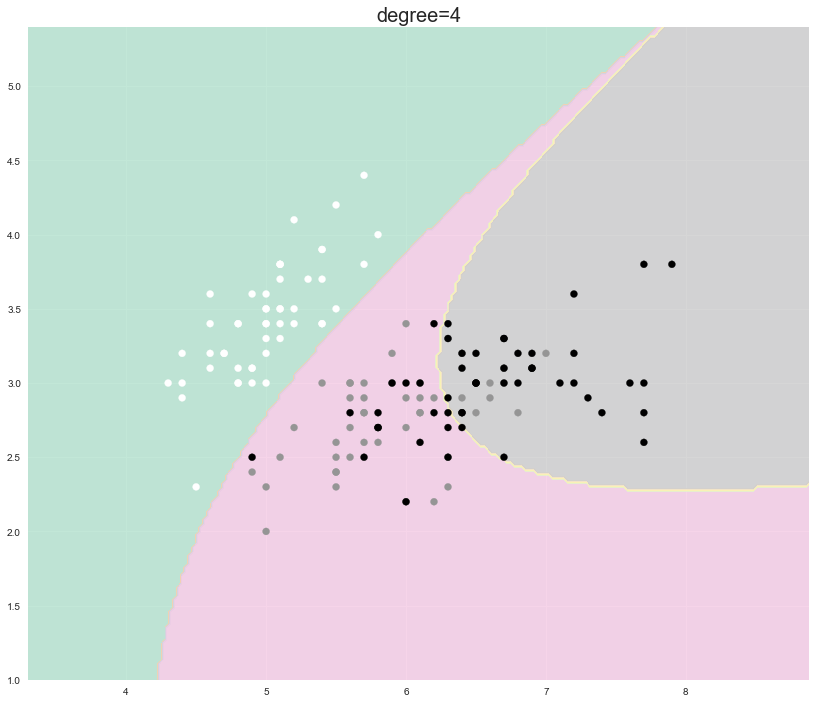

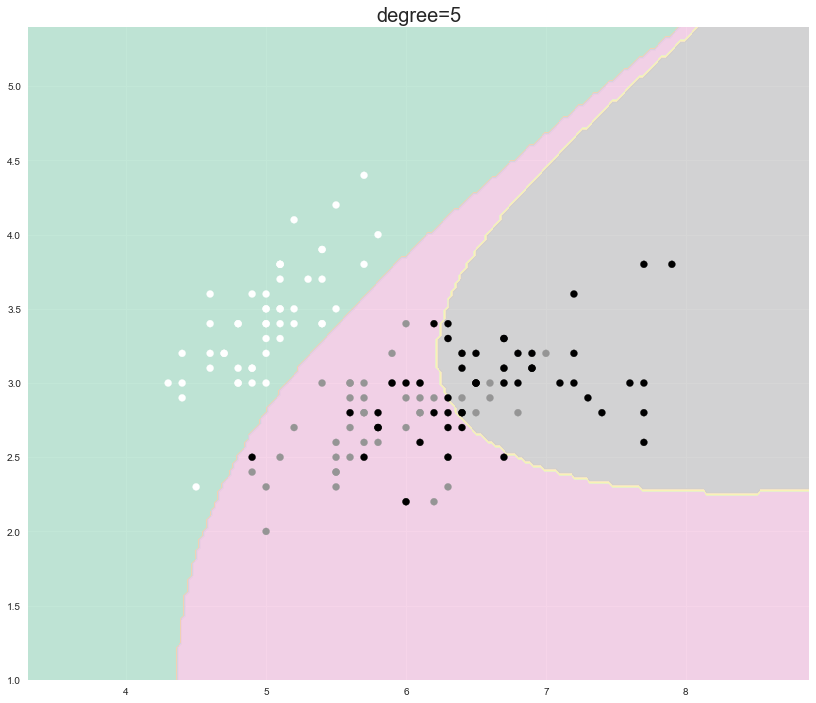

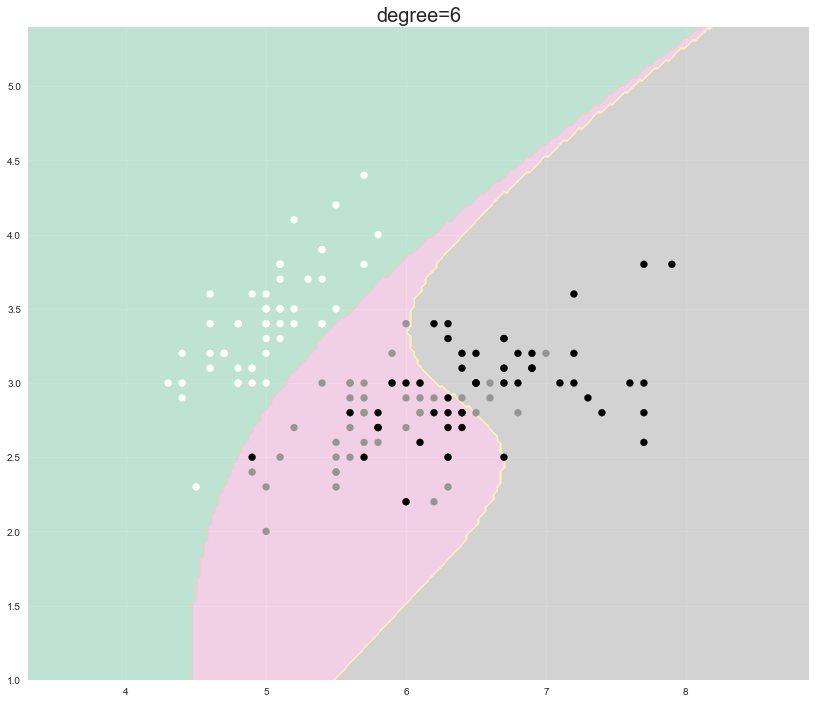

In [115]:
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
   svc = svm.SVC(kernel='poly', degree=degree).fit(X, y)
   plotSVC('degree=' + str(degree))

#### Import Dataset

In [116]:
#import data
#no header values
# applied after import
df = pd.read_csv('Datasets/pulsar.csv',sep=',',header=None)

##### Naming dataset columns

In [117]:
#naming columns
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

##### Attribute Information 
https://archive.ics.uci.edu/ml/datasets/HTRU2

* HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey
* Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. 
* They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter

* Each candidate is described by 8 continuous variables, and a single class variable. 
* The first four are simple statistics obtained from the integrated pulse profile 
* The remaining four variables are similarly obtained from the DM-SNR curve


1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

In regards the Class variable, 0 = negative, 1 = postitive


In [118]:
#dataframe shape
df.shape

(17898, 9)

##### First 5 rows

In [119]:
#first five rows
df.head()

IP Mean      IP Sd  IP Kurtosis  IP Skewness  DM-SNR Mean  DM-SNR Sd  \
0  140.562500  55.683782    -0.234571    -0.699648     3.199833  19.110426   
1  102.507812  58.882430     0.465318    -0.515088     1.677258  14.860146   
2  103.015625  39.341649     0.323328     1.051164     3.121237  21.744669   
3  136.750000  57.178449    -0.068415    -0.636238     3.642977  20.959280   
4   88.726562  40.672225     0.600866     1.123492     1.178930  11.468720   

   DM-SNR Kurtosis  DM-SNR Skewness  target_class  
0         7.975532        74.242225             0  
1        10.576487       127.393580             0  
2         7.735822        63.171909             0  
3         6.896499        53.593661             0  
4        14.269573       252.567306             0

##### Datatypes

In [120]:
#datatypes
print(df.dtypes.to_string())

IP Mean            float64
IP Sd              float64
IP Kurtosis        float64
IP Skewness        float64
DM-SNR Mean        float64
DM-SNR Sd          float64
DM-SNR Kurtosis    float64
DM-SNR Skewness    float64
target_class         int64


##### Check for **NULL** values

In [121]:
#null values
display(df.isnull().sum())

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

* no **NULL** values

##### Summary Statistics

In [122]:
#summary stats rounded to two places
round(df.describe(),2)

IP Mean     IP Sd  IP Kurtosis  IP Skewness  DM-SNR Mean  DM-SNR Sd  \
count  17898.00  17898.00     17898.00     17898.00     17898.00   17898.00   
mean     111.08     46.55         0.48         1.77        12.61      26.33   
std       25.65      6.84         1.06         6.17        29.47      19.47   
min        5.81     24.77        -1.88        -1.79         0.21       7.37   
25%      100.93     42.38         0.03        -0.19         1.92      14.44   
50%      115.08     46.95         0.22         0.20         2.80      18.46   
75%      127.09     51.02         0.47         0.93         5.46      28.43   
max      192.62     98.78         8.07        68.10       223.39     110.64   

       DM-SNR Kurtosis  DM-SNR Skewness  target_class  
count         17898.00         17898.00      17898.00  
mean              8.30           104.86          0.09  
std               4.51           106.51          0.29  
min              -3.14            -1.98          0.00  
25%               5.78            34.96          0.00  
50%               8.43            83.06          0.00  
75%              10.70           139.31          0.00  
max              34.54          1191.00          1.00

In [123]:
#outputting min and max values for each variable
for (columnName, columnData) in df.iteritems():
   print(columnName,': ', 'Min Value: ',round(columnData.min(),2)," : Max Value: ",round(columnData.max(),2))

IP Mean :  Min Value:  5.81  : Max Value:  192.62
IP Sd :  Min Value:  24.77  : Max Value:  98.78
IP Kurtosis :  Min Value:  -1.88  : Max Value:  8.07
IP Skewness :  Min Value:  -1.79  : Max Value:  68.1
DM-SNR Mean :  Min Value:  0.21  : Max Value:  223.39
DM-SNR Sd :  Min Value:  7.37  : Max Value:  110.64
DM-SNR Kurtosis :  Min Value:  -3.14  : Max Value:  34.54
DM-SNR Skewness :  Min Value:  -1.98  : Max Value:  1191.0
target_class :  Min Value:  0  : Max Value:  1


* Appears to be singnificant outliers particularly in DM - SNR Mean, DM-SNR Skewness and IP Mean columns

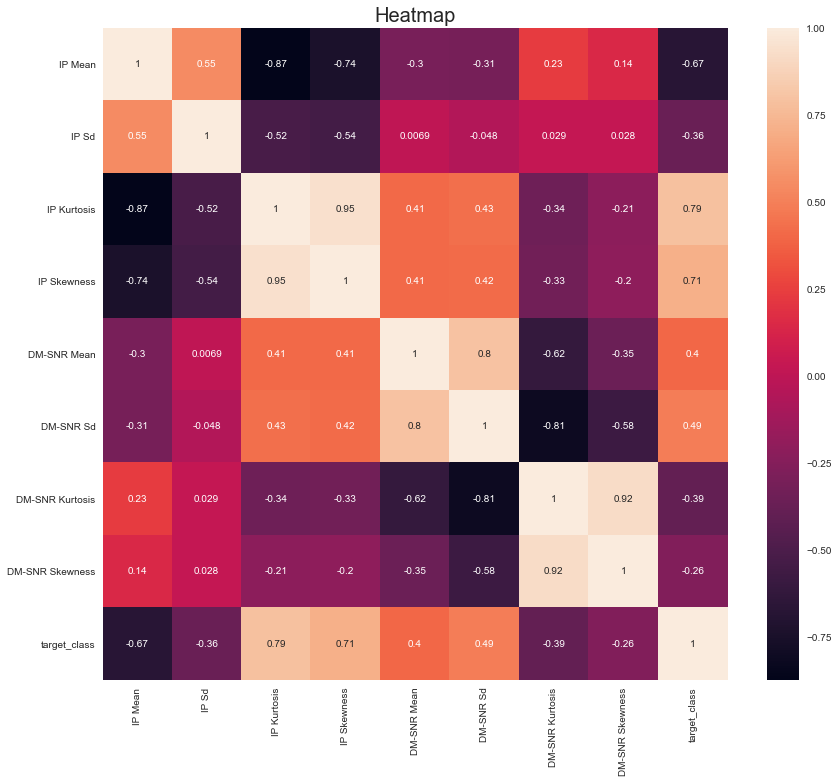

In [124]:
#seaborn heatmap
sns.heatmap(df.corr(),annot=True).set_title('Heatmap',fontsize=20);

* Strong negative correlation between IP Mean and IP skewness
* Strong Negative correlation between IP Mean and IP Kurtosis
* Strong Negative correlation between DM-SNR SD and DM-SNR Kurtosis

* Strong Positive Correlation between target_Class and IP Kurtosis
* Strong Positive Correlation between target_Class and IP Skewness

#### Data Visualisation

##### pairplot

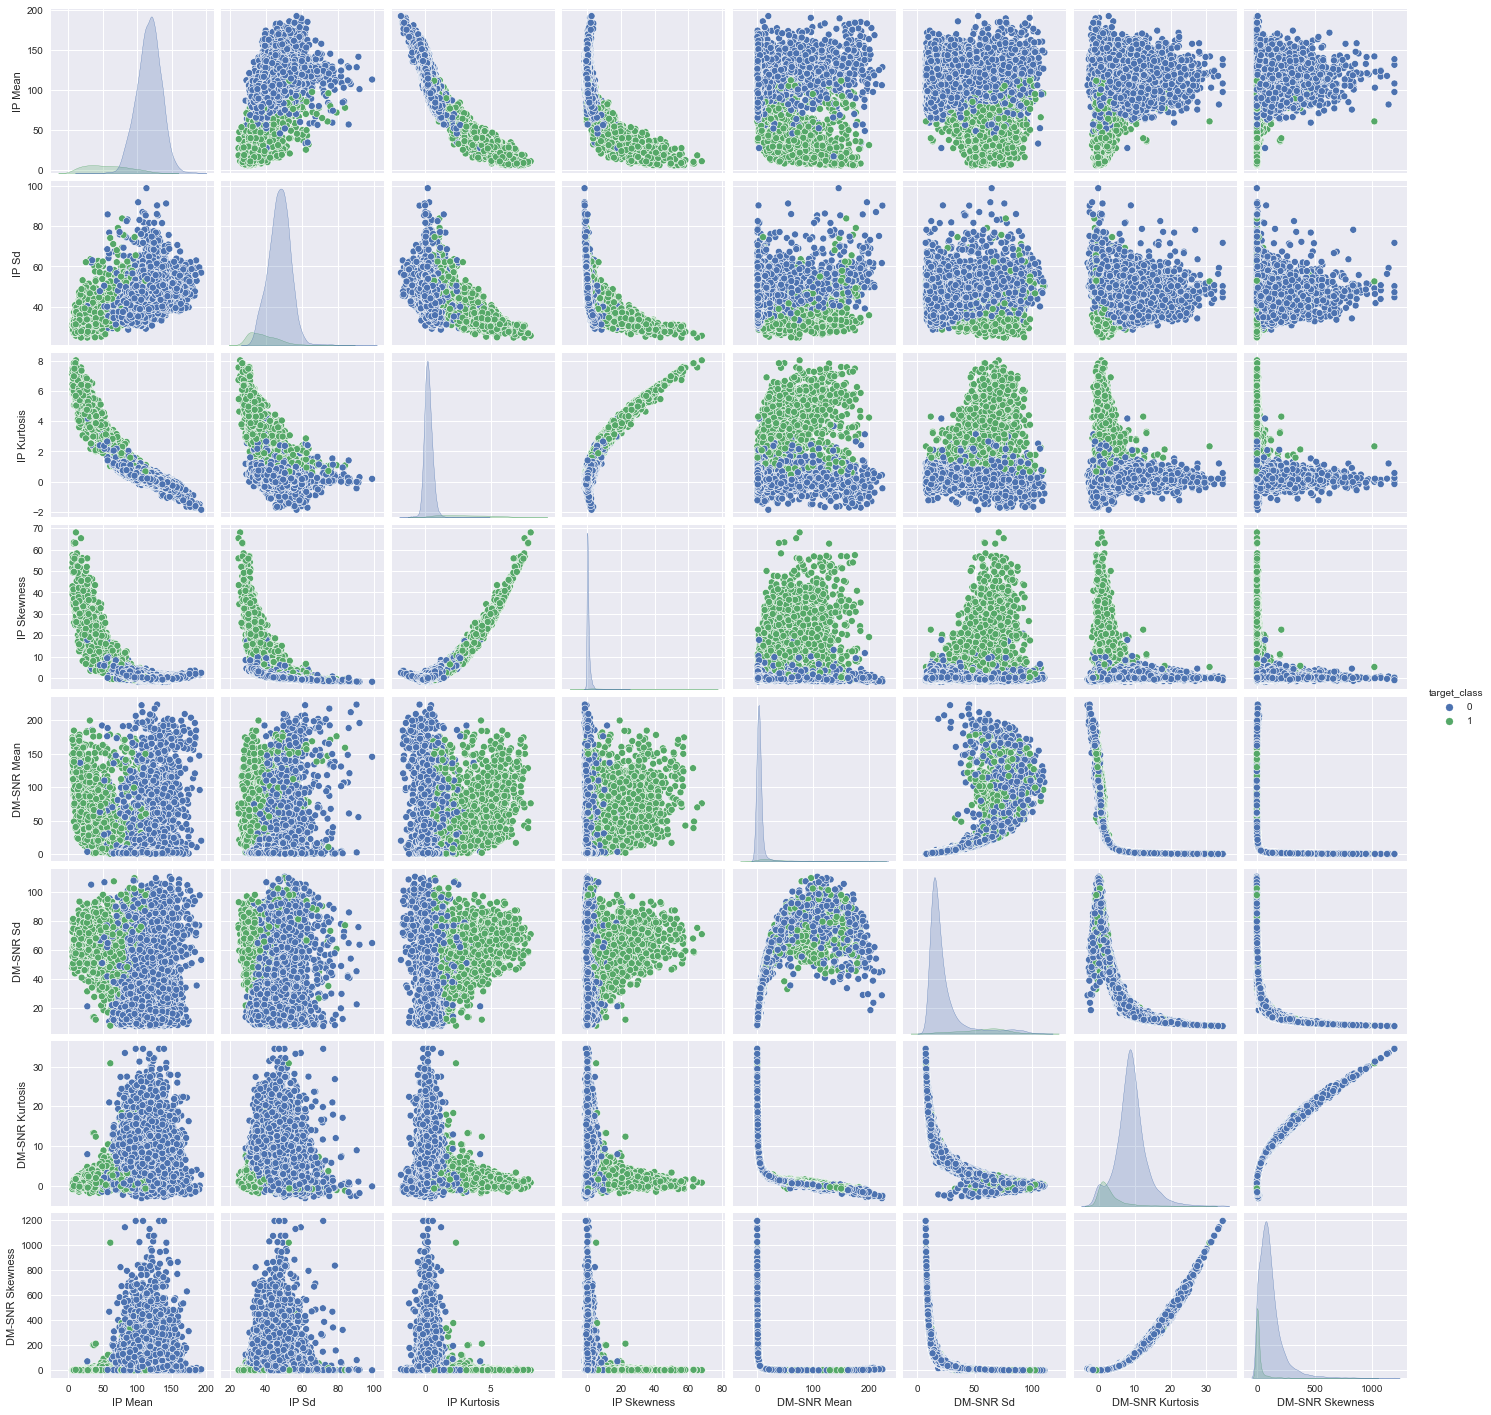

In [125]:
sns.pairplot(df,hue='target_class');

##### Histograms

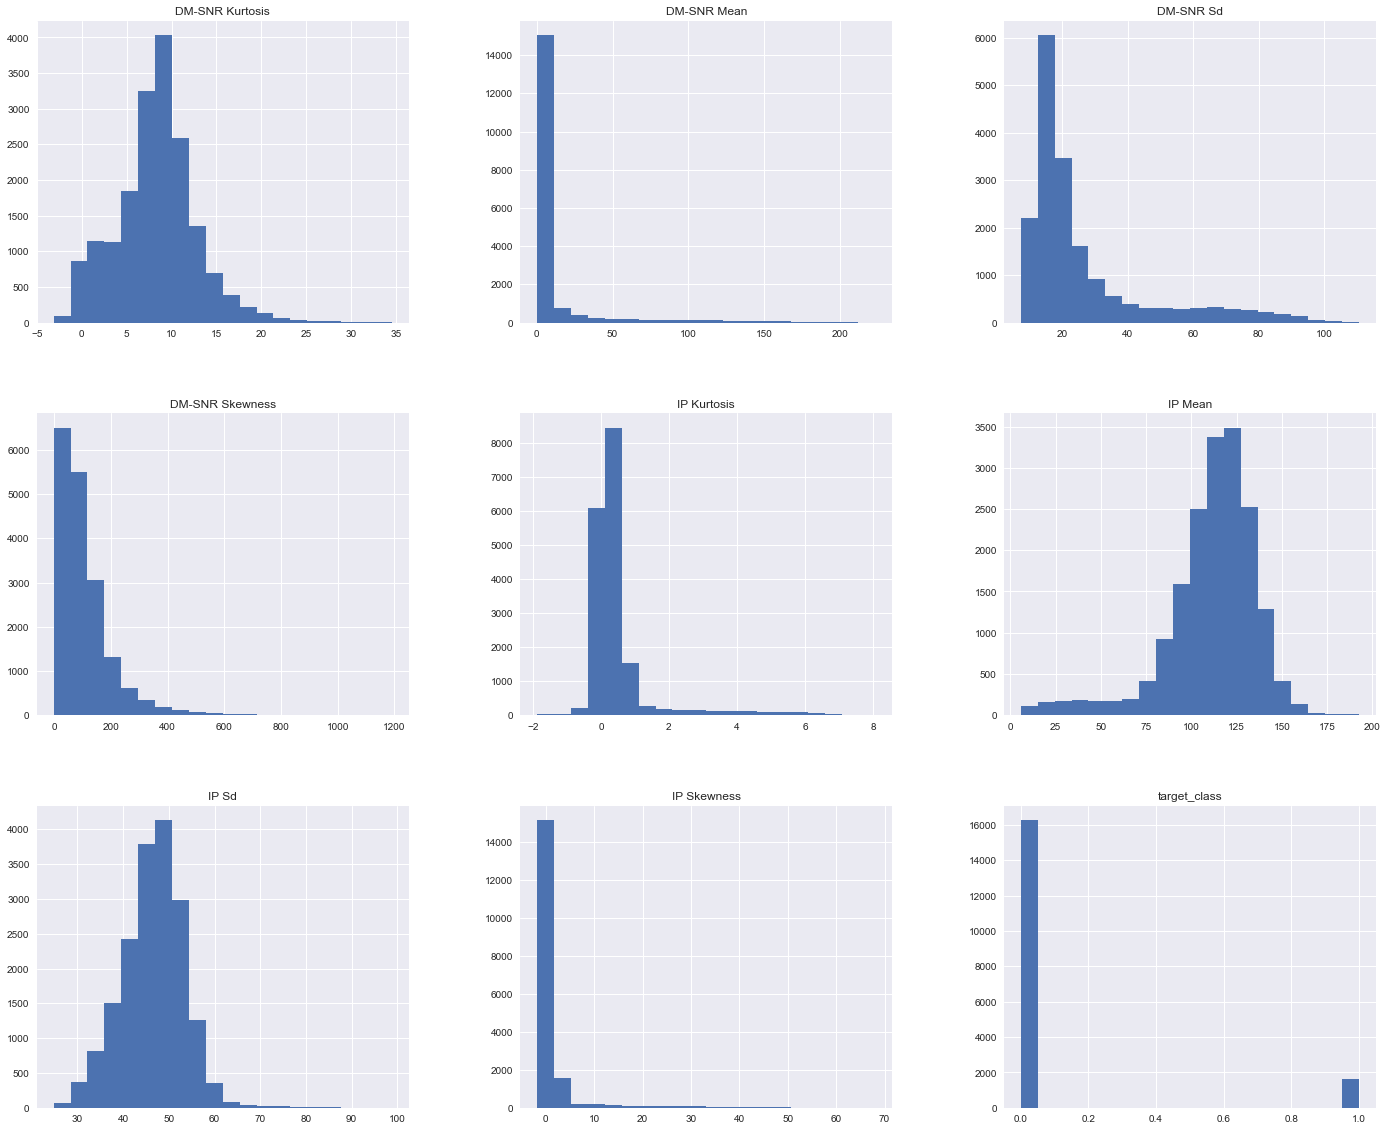

In [126]:
df.hist(bins=20,figsize=(24,20));

* The distribution of each continuos variable appears skewed

##### boxplots

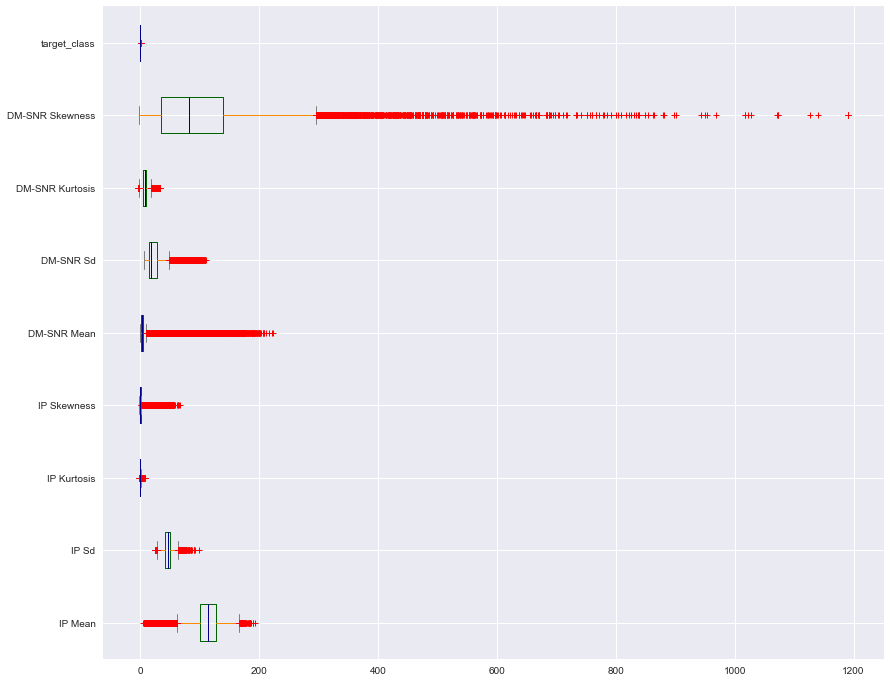

In [127]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

df.plot.box(color=color,sym='r+',vert=False,figsize=(14,12));

* Box Plot Observations confirm that they are alot of outliers in each variable


Target Class Count
0    16259
1     1639

% Breakdown
0    0.908426
1    0.091574


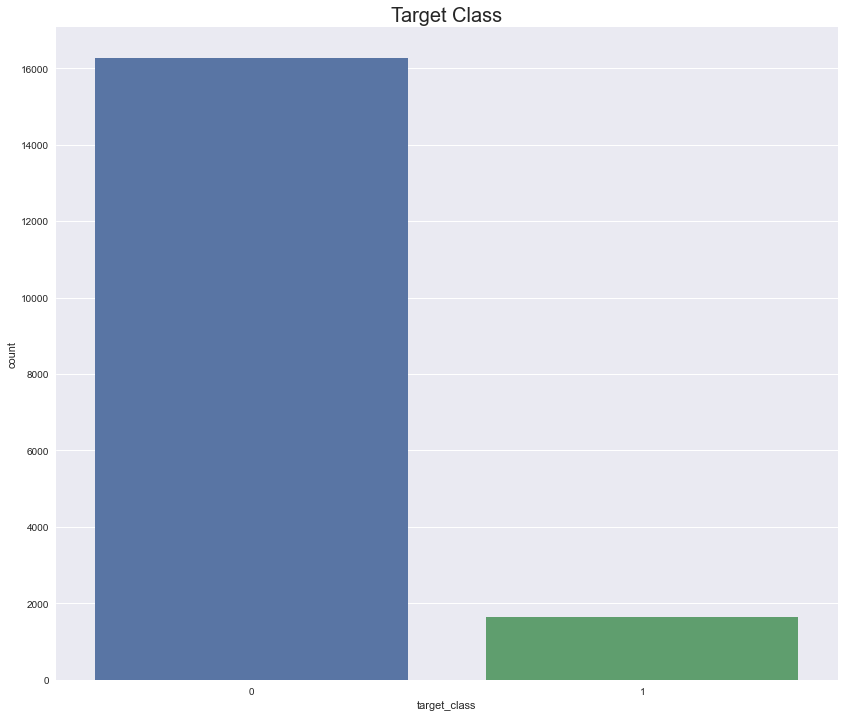

In [128]:
#breakdown of target class

#value counts
print('Target Class Count')
vc = df['target_class'].value_counts() # for printing
vpercent = vc/np.float(len(df))
print(vc.to_string())

print("")

#% breakdown
print("% Breakdown")
print(vpercent.to_string())
sns.countplot(x='target_class',data=df).set_title('Target Class',fontsize=20);


* The value counts of the target class is very unbalanced approx 90:10 ratio

#### Split Dataset

In [129]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Length of Training Dataset: ",len(X_train))
print("Columns of Training Dataset: ",X_train.shape[1])
print("")
print("Length of Test Dataset: ",len(X_test))
print("Columns of Test Dataset: ",X_test.shape[1])


Length of Training Dataset:  14318
Columns of Training Dataset:  8

Length of Test Dataset:  3580
Columns of Test Dataset:  8


#### Building and Fitting the Model

${\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {\|\mathbf {x} -\mathbf {x'} \|^{2}}{2\sigma ^{2}}}\right)}$

* Default hyperparameter means C=1.0, kernel=rbf (Radial basis function kernel) and gamma=auto among other parameters
* The Radial Basis Function that we are using with our SVM assumes data is centered and scaled.
* This means each column should have a mean of **0** and a standard deviation of **1**
* Training and Test dataets scaled seperatley to avoid data leakage
* Leakage occurs when info about the training dataset corrupts or influences the testing dataset

#### Feature Scaling

* The Radial Basis Function that we are using with our SVM assumes data is centered and scaled.
* This means each column should have a mean of **0** and a standard deviation of **1**

* Training and Test datasets scaled seperatley to avoid data leakage
* Leakage occurs when info about the training dataset corrupts or influences the testing dataset

<br>

##### Using *fit_transform* and *transform*
* *fit_transform* used on training data
* The model learns the mean and variance of the features of the training set

* *tranform* used on test data
* avoid bias within our model and ensures new test set for the model



In [130]:
#scaler function
scaler = StandardScaler()

#scaling train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


In [131]:
X_train.describe()

IP Mean         IP Sd   IP Kurtosis   IP Skewness   DM-SNR Mean  \
count  1.431800e+04  1.431800e+04  1.431800e+04  1.431800e+04  1.431800e+04   
mean   1.986604e-16 -6.757488e-16  2.125527e-17  3.581784e-17 -2.205248e-17   
std    1.000035e+00  1.000035e+00  1.000035e+00  1.000035e+00  1.000035e+00   
min   -4.035499e+00 -3.181033e+00 -2.185946e+00 -5.744051e-01 -4.239001e-01   
25%   -3.896291e-01 -6.069473e-01 -4.256221e-01 -3.188054e-01 -3.664918e-01   
50%    1.587461e-01  5.846646e-02 -2.453172e-01 -2.578142e-01 -3.372294e-01   
75%    6.267059e-01  6.501017e-01 -1.001238e-02 -1.419621e-01 -2.463724e-01   
max    3.151882e+00  7.621116e+00  7.008906e+00  1.054430e+01  7.025568e+00   

          DM-SNR Sd  DM-SNR Kurtosis  DM-SNR Skewness  
count  1.431800e+04     1.431800e+04     1.431800e+04  
mean  -1.583840e-16    -9.700300e-18     1.214786e-16  
std    1.000035e+00     1.000035e+00     1.000035e+00  
min   -9.733707e-01    -2.455649e+00    -1.003411e+00  
25%   -6.125457e-01    -5.641035e-01    -6.627590e-01  
50%   -4.067482e-01     3.170446e-02    -2.059136e-01  
75%    1.078934e-01     5.362759e-01     3.256217e-01  
max    4.292181e+00     5.818557e+00     1.024613e+01

* Standard Deviation scaled across all variables to approx 1

#### Building and Fitting model with scaled data

In [132]:
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)

#### Model Score and Performance

Model accuracy score with default hyperparameters: 0.9827
-----------------------------------------
The number of pulsars misclassed is:  62
-----------------------------------------
ACTUAL DATA: 
0    3306
1     274
-----------------------------------------
0    3330
1     250


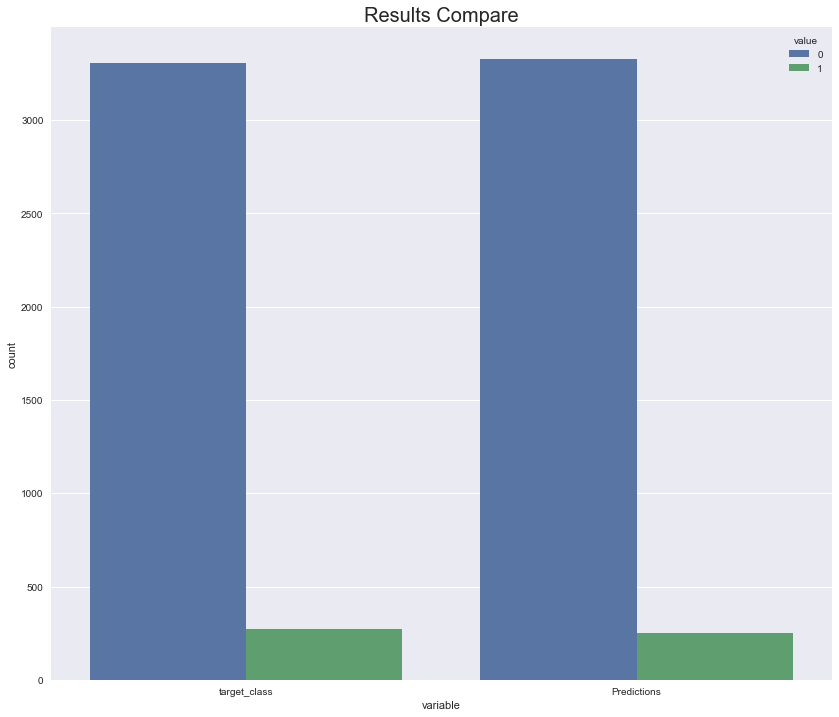

In [133]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

compare_result = pd.DataFrame(y_test)
compare_result['Predictions'] = y_pred

misclass_one = compare_result[compare_result['Predictions'] != compare_result['target_class']]
print("-----------------------------------------")
print("The number of pulsars misclassed is: ",len(misclass_one))
print("-----------------------------------------")

print("ACTUAL DATA: ")
print(compare_result['target_class'].value_counts().to_string())
print("-----------------------------------------")
print(compare_result['Predictions'].value_counts().to_string())


compare_result_melt = pd.melt(compare_result) #for countplot 2 columns side by side
sns.countplot(hue='value',x='variable',data=compare_result_melt).set_title('Results Compare',fontsize=20);

#### Confusion Matrix

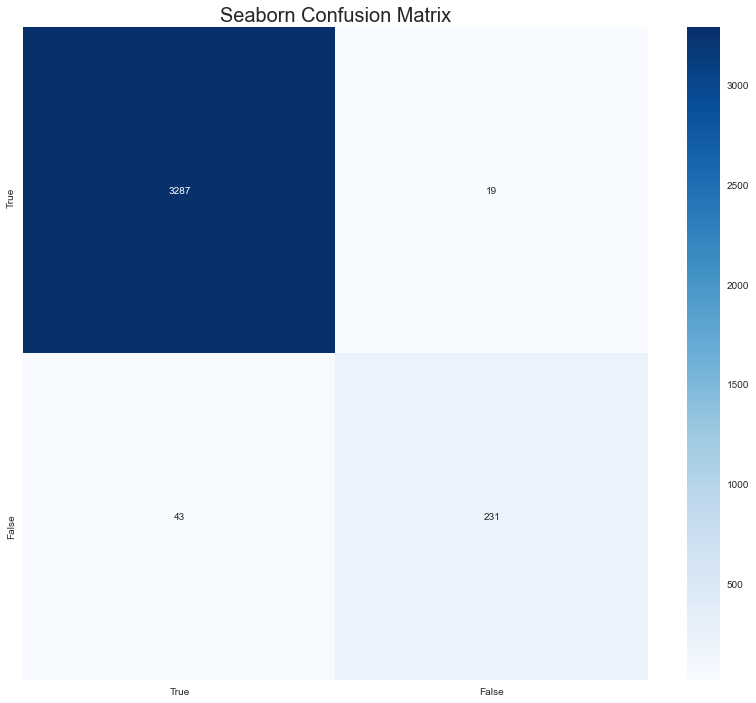

In [134]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(compare_result['target_class'], compare_result['Predictions'])



#print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Seaborn Confusion Matrix',fontsize=20);


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False']);

#### Stratified k-Fold Cross-Validation

Earlier we used a straight cross validation when looking at the KNN model. Becuase of the unbalance in the dataset we can apply a stratified k-fold cross-validation 

In [135]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X_test, y_test, cv=kfold)
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))
print("")
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified Cross-validation scores with rbf kernel:

[0.98324022 0.98463687 0.98603352 0.97905028 0.98743017]

Average stratified cross-validation score with rbf kernel:0.9841


#### Gridsearch and Hypertuning the Model

* As before, hypertune or model to see which are the best params to use!!

In [136]:
# ref https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

#parameters to run for hypertuning
param_grid=[
    {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

#applying optimal parameters
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
verbose=0)

#fitting optimal parameters
optimal_params.fit(X_train,y_train)

#best score with optimal parameters
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


In [137]:
#create variables for different results
svm_params = optimal_params.cv_results_['params']
rank_test_score = optimal_params.cv_results_['rank_test_score']
mean_test_score = optimal_params.cv_results_['mean_test_score']

In [138]:
#dataframe for results
res = pd.DataFrame(svm_params)
res['Rank Score'] = rank_test_score
res['Mean Score'] = mean_test_score

print(res[res['Mean Score']==res['Mean Score'].max()])

     C  gamma kernel  Rank Score  Mean Score
11  10    0.3    rbf           1    0.979327


#### Fitting Model with optimal parameters

In [139]:
svc=SVC(C=10,gamma=0.3,kernel='rbf') 


# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

#### Model Score and performance

Model accuracy score with optimal hyperparameters: 0.9835
-----------------------------------------
The number of pulsars misclassed is:  59
-----------------------------------------
ACTUAL DATA: 
0    3306
1     274
-----------------------------------------
0    3331
1     249


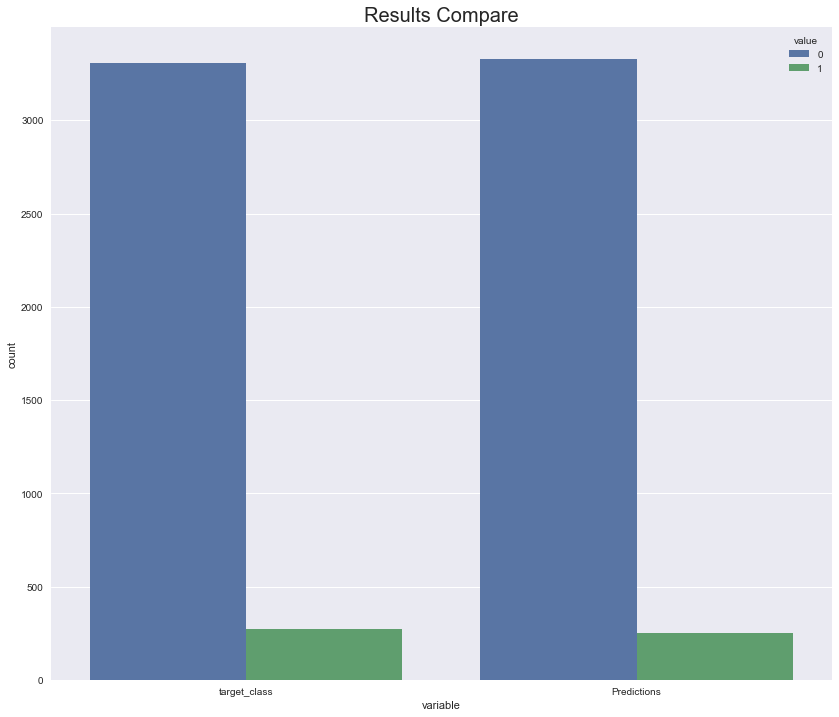

In [140]:
# compute and print accuracy score
print('Model accuracy score with optimal hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

compare_result = pd.DataFrame(y_test)
compare_result['Predictions'] = y_pred

misclass_two = compare_result[compare_result['Predictions'] != compare_result['target_class']]
print("-----------------------------------------")
print("The number of pulsars misclassed is: ",len(misclass_two))
print("-----------------------------------------")

print("ACTUAL DATA: ")
print(compare_result['target_class'].value_counts().to_string())
print("-----------------------------------------")
print(compare_result['Predictions'].value_counts().to_string())


compare_result_melt = pd.melt(compare_result) #for countplot 2 columns side by side
sns.countplot(hue='value',x='variable',data=compare_result_melt).set_title('Results Compare',fontsize=20);

* applying best parameters after hypertuning the model sees a reduction in the number misclassed. 

#### Model with Polynomial Kernel

In [141]:
svc=SVC(kernel='poly') 


# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

Model accuracy score with default hyperparameters: 0.9807
-----------------------------------------
The number of pulsars misclassed is:  69
-----------------------------------------
ACTUAL DATA: 
0    3306
1     274
-----------------------------------------
0    3345
1     235


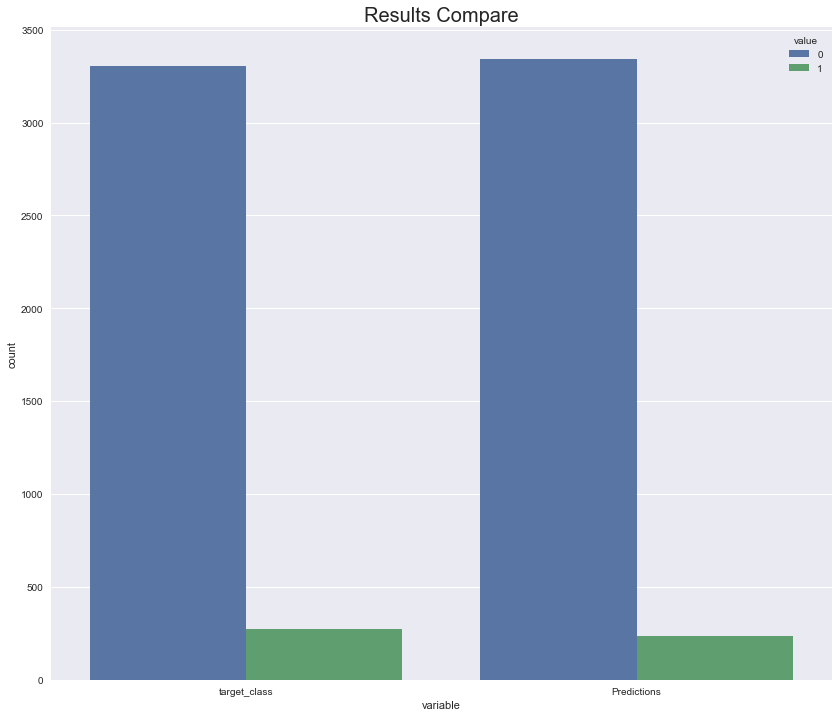

In [142]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

compare_result = pd.DataFrame(y_test)
compare_result['Predictions'] = y_pred

misclass_three = compare_result[compare_result['Predictions'] != compare_result['target_class']]
print("-----------------------------------------")
print("The number of pulsars misclassed is: ",len(misclass_three))
print("-----------------------------------------")

print("ACTUAL DATA: ")
print(compare_result['target_class'].value_counts().to_string())
print("-----------------------------------------")
print(compare_result['Predictions'].value_counts().to_string())


compare_result_melt = pd.melt(compare_result) #for countplot 2 columns side by side
sns.countplot(hue='value',x='variable',data=compare_result_melt).set_title('Results Compare',fontsize=20);

#### Gridsearch and hypertuning the polynomial model

In [143]:
param_grid=[
    {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} ]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
verbose=0)

optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'C': 1000, 'degree': 3, 'gamma': 0.04, 'kernel': 'poly'}
0.9775806767913486


#### Fitting Model with optimal parameters

In [144]:
svc=SVC(kernel='poly',C=1000,gamma=0.04,degree=3) 


# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

#### Evaluating the Model

Model accuracy score with default hyperparameters: 0.9835
-----------------------------------------
The number of pulsars misclassed is:  59
-----------------------------------------
ACTUAL DATA: 
0    3306
1     274
-----------------------------------------
0    3329
1     251


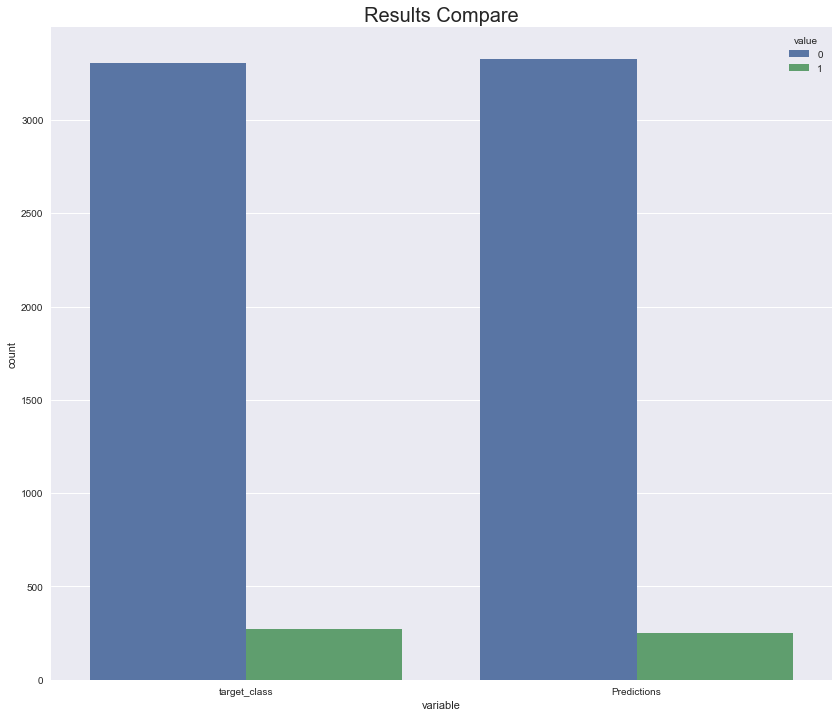

In [145]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

compare_result = pd.DataFrame(y_test)
compare_result['Predictions'] = y_pred

misclass_four = compare_result[compare_result['Predictions'] != compare_result['target_class']]
print("-----------------------------------------")
print("The number of pulsars misclassed is: ",len(misclass_four))
print("-----------------------------------------")

print("ACTUAL DATA: ")
print(compare_result['target_class'].value_counts().to_string())
print("-----------------------------------------")
print(compare_result['Predictions'].value_counts().to_string())


compare_result_melt = pd.melt(compare_result) #for countplot 2 columns side by side
sns.countplot(hue='value',x='variable',data=compare_result_melt).set_title('Results Compare',fontsize=20);

In [147]:
#print staments of each model misclassied predictions
print("Misclassed with default rbf hyperparameters",len(misclass_one['Predictions']))
print("Misclassed with optimal rbf kernel hyperparameters",len(misclass_two['Predictions']))
print("Misclassed with default polynomial hyperparameters",len(misclass_three['Predictions']))
print("Misclassed with optimal polynomial hyperparameters",len(misclass_four['Predictions']))

Misclassed with default rbf hyperparameters 62
Misclassed with optimal rbf kernel hyperparameters 59
Misclassed with default polynomial hyperparameters 69
Misclassed with optimal polynomial hyperparameters 59


<br>

***

## References

* https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
* https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
* https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
* https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
* https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://scikit-learn.org/stable/modules/svm.html
* https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be
* https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
* https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
* https://learnopencv.com/svm-using-scikit-learn-in-python/
* https://machinelearningknowledge.ai/python-sklearn-support-vector-machine-svm-tutorial-with-example-gridsearchcv/
* https://blog.paperspace.com/implementing-support-vector-machine-in-python-using-sklearn/
* https://www.kaggle.com/prashant111/svm-classifier-tutorial
* https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

***
# End